### 기본 설정 

In [1]:
# 필요 라이브러리 호출
!pip install scipy --upgrade
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#colab plot의 한글깨짐 해결

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='Black Han Sans') 
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


## **목차(index)**
1. 프로젝트 개요
2. 프로젝트 주제
3. 데이터 개요
4. 데이터 탐색적 분석(EDA)
5. 데이터 전처리
6. feature engineering
7. 분석 및 결과
  * 지역별로 선호하는 게임장르
  * 장르와 플랫폼별 연도에 따른 트랜드 변화
 * 10년 단위 장르별 트렌드 
 * 10년 단위 플랫폼별 트렌드 
 * 연대별 트랜드 - 가설 검증 
  * 2000~2020년 출고량이 많은 게임들의 특징
  * Electronic Arts에서 새롭게 게임을 출시한다면 어떨까?
  * Action 게임을 새롭게 출시한다면 어떨까?
8. 결론 및 인사이트
---

## **1.프로젝트 개요**
- 게임 회사의 데이터 분석가로 다음 (연도 날짜) 분기에 게임을 런칭할 계획을 가지고 있습니다. 
- 이때 40년동안 출시된 게임의 연도와 지역의 출고량 데이터를 통해 게임시장의 선호도와 트랜드변화를 파악하여
- 앞으로 게임시장은 어떻게 될지 인사이트를 가지고 새롭게 출시할 게임을 설계하는 프로젝트 입니다.

## **2.프로젝트 주제**
- 다음 분기에 출시할 게임을 데이터 분석을 통해 설계하기 

### **세부 목표(Goal of project)**
1.   어떤 장르의 게임을 출시할 것 인가?
2.   어떤 플렛폼을 통하여 출시할 것인가?
3.   어느 지역에 출시할 것인가?
4.   어느 게임회사를 통해서 출시할 것인가?
5.   언제 출시하는 것이 가장 좋은가?



 ## **3.데이터 개요**
 - Name : 게임의 이름입니다.
 - Platform : 게임이 지원되는 플랫폼의 이름입니다.
 - Year : 게임이 출시된 연도입니다.
 - Genre : 게임의 장르입니다.
 - Publisher : 게임을 배급한 회사입니다.
 - NA_Sales : 북미지역에서의 출고량입니다.
 - EU_Sales : 유럽지역에서의 출고량입니다.
 - JP_Sales : 일본지역에서의 출고량입니다.
 - Other_Sales : 기타지역에서의 출고량입니다.

## **4.데이터 탐색적 분석(EDA)**

In [3]:
# 데이터 불러오기 
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv').drop(columns = ['Unnamed: 0'])
#.rename(columns = {'Unnamed: 0':'index'}).set_index('index')
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [4]:
# 데이터 개수, 데이터 타입, 결측값 확인
df.info()
# 데이터 평균,최소,최대값 확인 
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB
               Year
count  16327.000000
mean    1994.242543
std      155.077168
min        0.000000
25%     2003.000000
50%     2007.000000
75%     2010.000000
max     2020.000000


1. 총 16598개의 행(row)과 9개(columns)의 열로 이루어져 있습니다. 
2. 지역별 출고량의 데이터타입이 object이며 단위 K와 M이 섞여있습니다. 

  **-> 숫자형(float)타입으로 바꾸어 분석하기 쉽게 전처리, 기존 데이터는 1000, K는 1000, M는 100,000으로 변경**
3. 연도 float형을 타입입니다.
 
 **-> object형으로 전처리**
4. 연도(Year),장르(Genre),배급회사(Publisher)에 결측치 존재합니다. 

  **-> 결측치 처리**
5. 시각화 분석 
  - boxplot 그리기 : 이상치 확인
  - heatmap 그리기 : 상관관계 파악


## **5.데이터 전처리**

In [5]:
#연도(Year),장르(Genre),배급회사(Publisher)에 결측치 처리
print(df.isnull().sum())
df[df.Year.isnull() | df.Genre.isnull() | df.Publisher.isnull()]
df = df.dropna(axis=0).reset_index(drop=True)

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


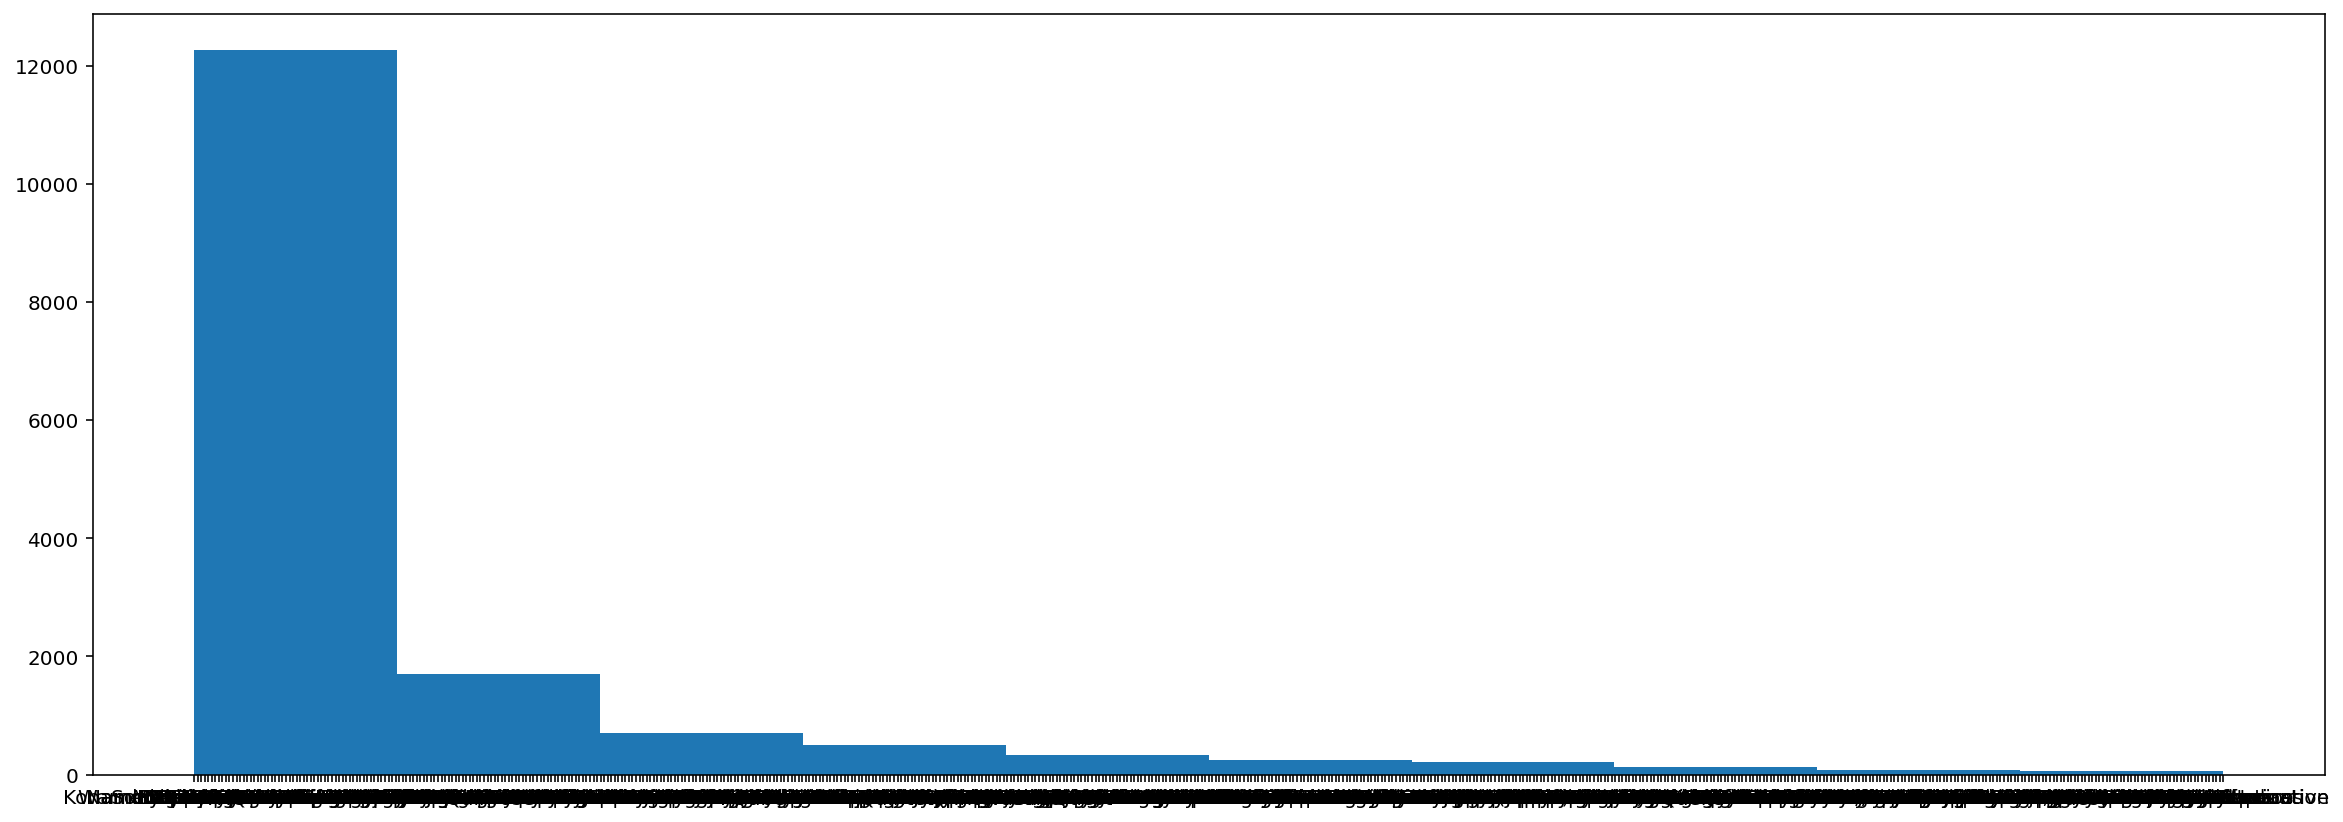

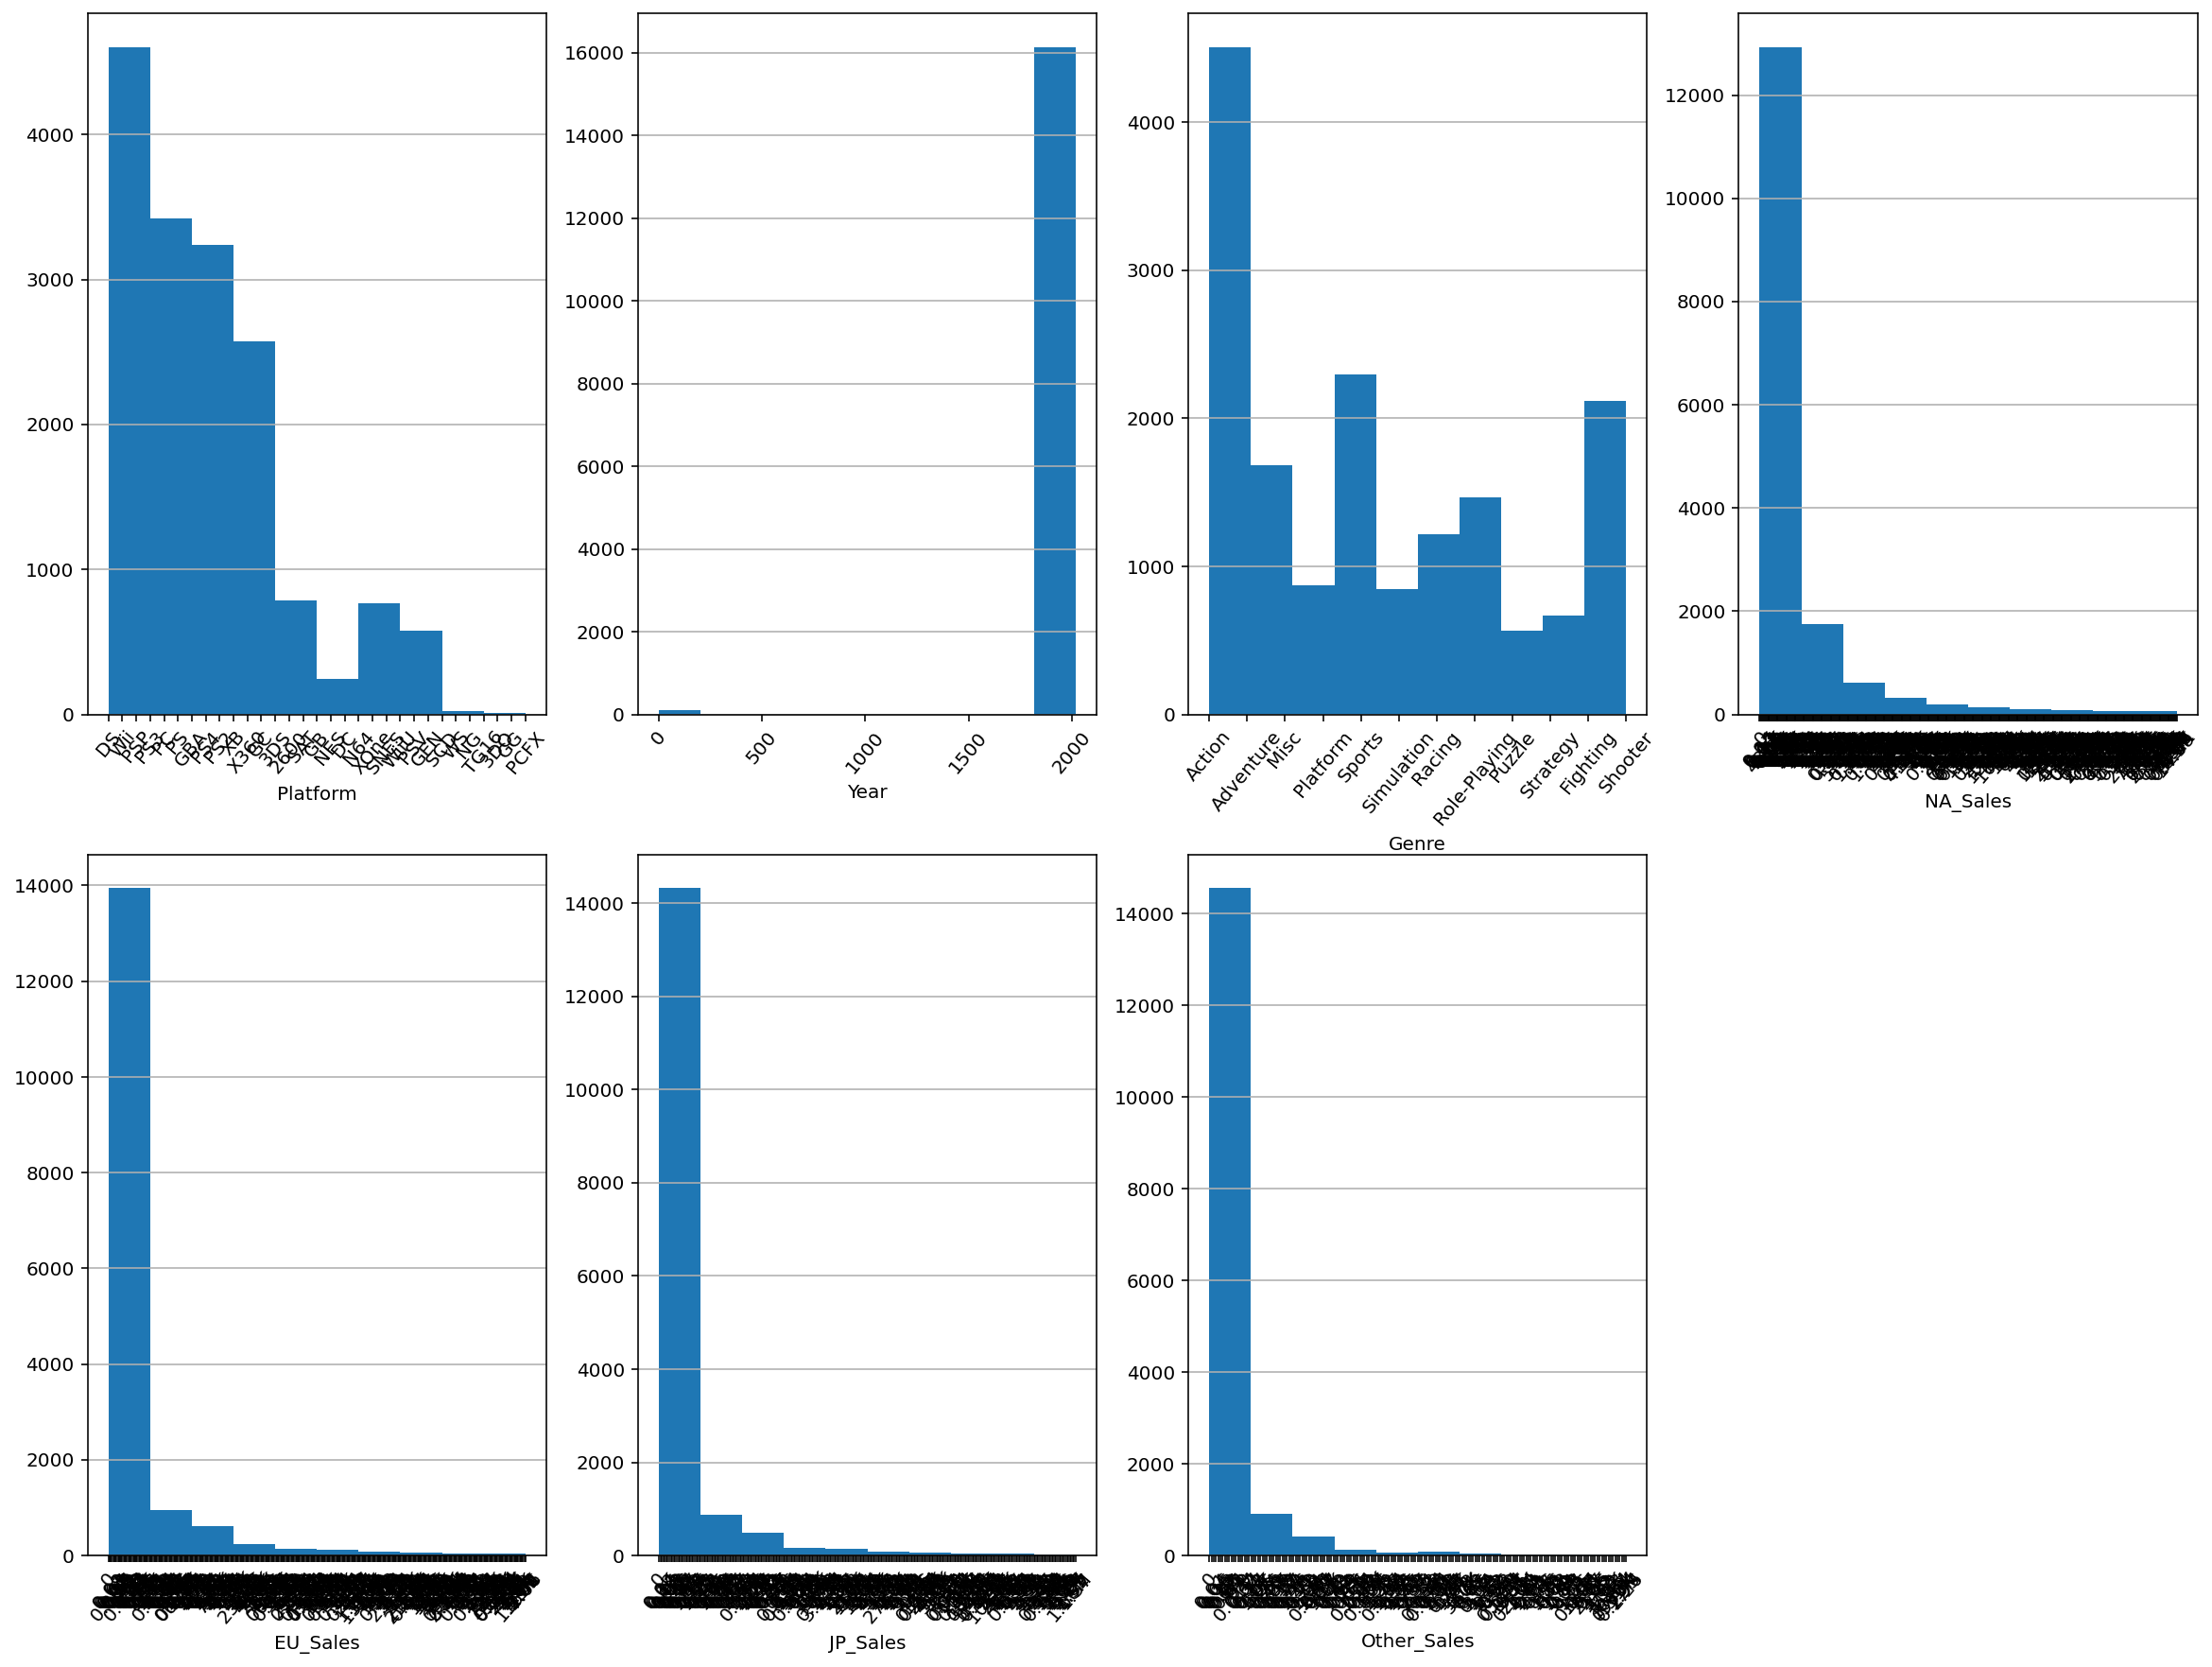

In [6]:
# 히스토그램으로 칼럼별 분포 확인
fig = plt.figure(figsize=(20,7))
plt.hist(df['Publisher']);

fig = plt.figure(figsize=(20,15))

for i , v in enumerate(df[['Platform','Year', 'Genre', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]):
  plt.subplot(2,4,i+1)
  plt.hist(df[v])
  plt.xlabel(v)
  plt.grid(True,axis='y')
  plt.xticks(rotation=50)
plt.show();

In [7]:
# 연도 데이터 수정 
def year(x):
  if x <= 20:
    return x + 2000 
  elif x <= 100:
    return x + 1900
  else:
    return x

#함수 적용하기
df['Year'] = df['Year'].apply(year)

# 연도 objcet로 변환
df.Year = df.Year.astype('int')
df.Year = df.Year.astype('object')


In [8]:
def unit(x): # 출고량 단위 통일하기 
  if  str(x).find('K') != -1:
    return float(str(x).split('K')[0].replace('.','')) * 1000
  elif str(x).find("M") != -1:
    return float(str(x).split('M')[0].replace('.','')) * 1000000
  else:
    return float(str(x).replace('.','')) * 1000000

for col in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
 df[col] = df[col].apply(unit)

print(df.info())
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  object 
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.1+ MB
None


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4000000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17000000.0,0.0,0.0,1000000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2000000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4000000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12000000.0,9000000.0,0.0,4000000.0
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.0,0.0,14000000.0,0.0
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,2000000.0,1000000.0,0.0,0.0
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,7000000.0,0.0,11000000.0,1000000.0
8,Imabikisou,PS3,2007,Adventure,Sega,0.0,0.0,4000000.0,0.0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,4000000.0,3000000.0,0.0,1000000.0


In [9]:
# 연도 object형 변환하기 
#df.Year = df.Year.astype('object')
df.dtypes

Name            object
Platform        object
Year            object
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

- 연도(Year)에서 0에 근처에 데이터가 있는 것을 알 수 있습니다. 
- **-> 이를 확인하여 제대로 된 연도로 변경해야합니다.**
- 지역별 출고량(NA_Sales,EU_Sales,JP_Sales,Other_Sales) 이상치 값이 있는 것을 알 수 있습니다. 
- **-> boxplot으로 이상치를 제대로 파악합니다.**

### boxplot 그래프
- 출고량 이상치 확인 
- 현재 가장 많이 팔린 게임은 마인크래프트로 2억3천8백만장입니다. 
- 출처: wikipedia: https://en.wikipedia.org/wiki/List_of_best-selling_video_games

### 이상치 개수
- NA_Sales: 199개
- EU_Sales: 93개
- JP_Sales: 55개
- Other_Sales: 11개

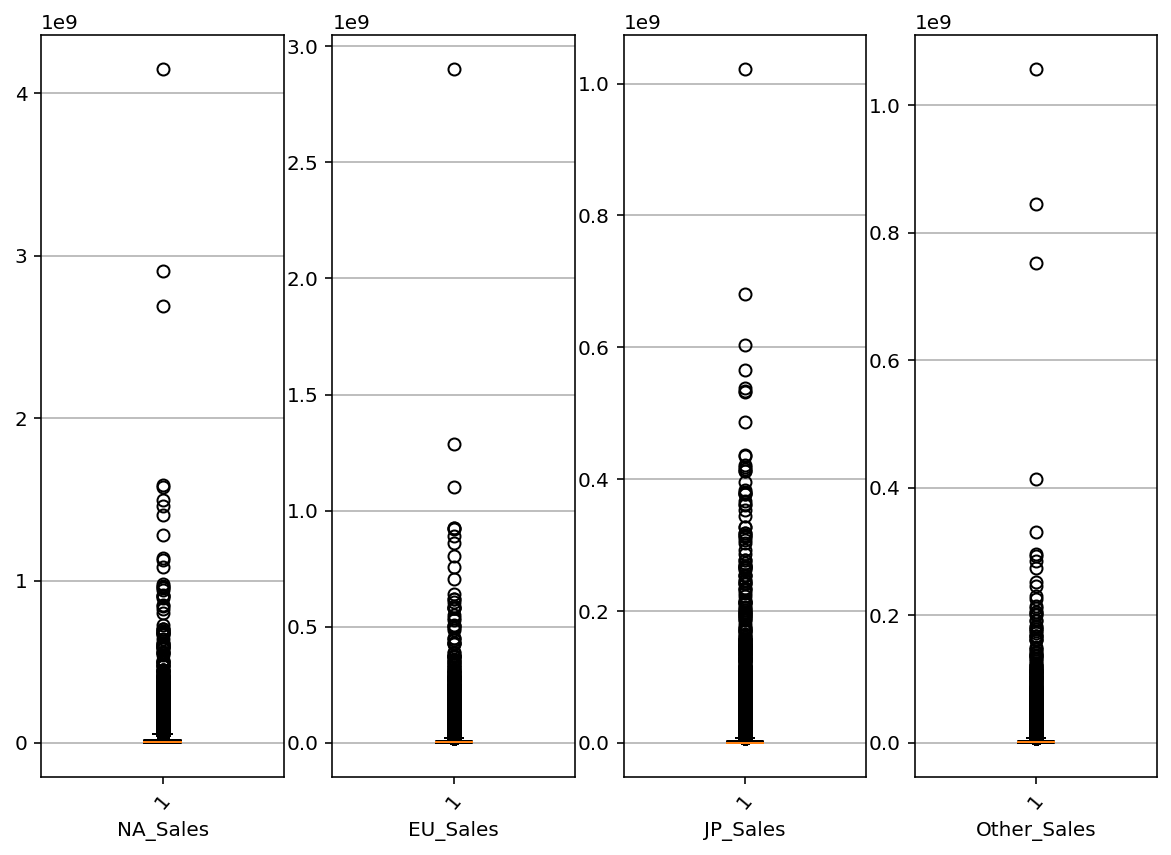

In [10]:
# boxplt 그래프 : 이상치 확인 
fig = plt.figure(figsize=(10,15))

for i , v in enumerate(df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]):
  plt.subplot(2,4,i+1)
  plt.boxplot(df[v])
  plt.xlabel(v)
  plt.grid(True,axis='y')
  plt.xticks(rotation=50)
plt.show();

 NA_Sales의 이상치 개수 :199
 EU_Sales의 이상치 개수 :199
 JP_Sales의 이상치 개수 :55
 Other_Sales의 이상치 개수 :11


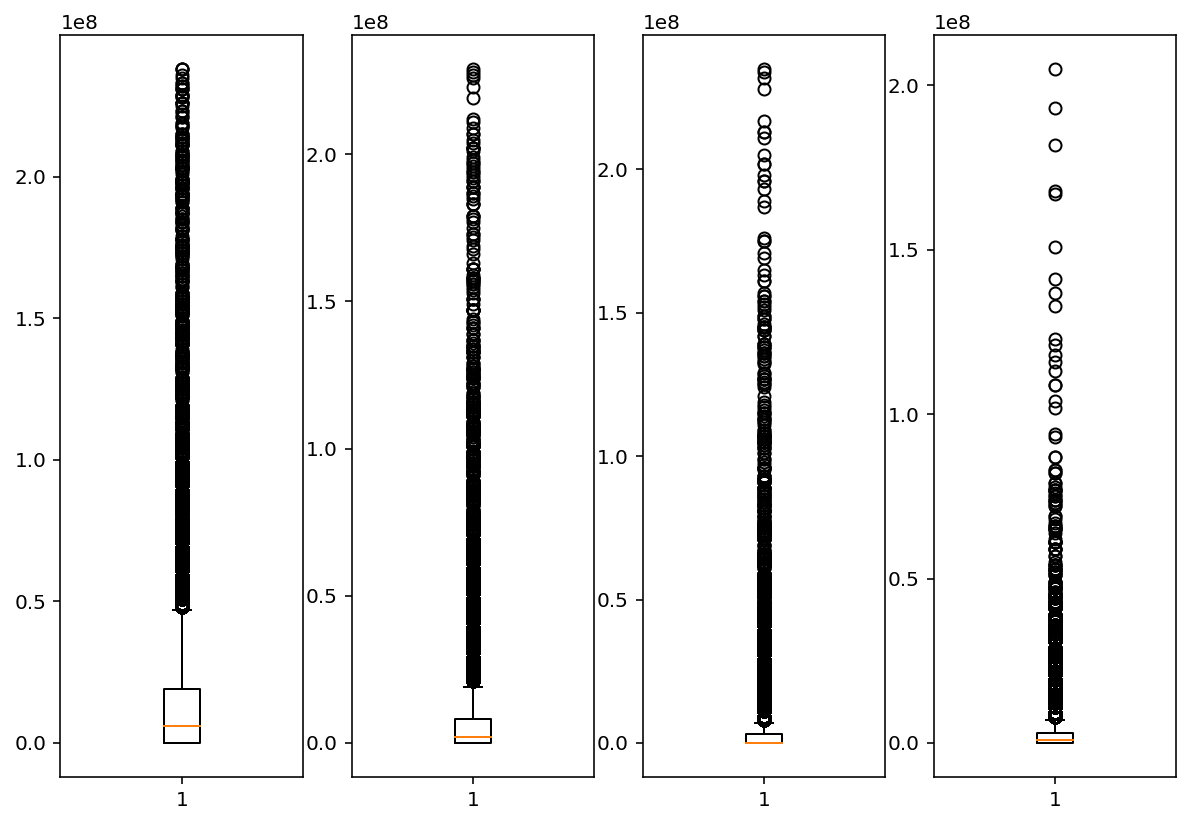

In [11]:
#238000000을 보다 큰 출고량의 이상치 개수 확인 
# NA_Sales : 199개, EU_Sales: 93개 ,JP_Sales: 55개, Other_Sales:11개
df1 = df[df['NA_Sales'] > 238000000]
df2 = df[df['EU_Sales'] > 238000000]
df3 = df[df['JP_Sales'] > 238000000]
df4 = df[df['Other_Sales'] > 238000000]

print(' NA_Sales의 이상치 개수 :'+ str(df1.shape[0])) 
print(' EU_Sales의 이상치 개수 :'+ str(df1.shape[0])) 
print(' JP_Sales의 이상치 개수 :'+ str(df3.shape[0])) 
print(' Other_Sales의 이상치 개수 :'+ str(df4.shape[0])) 

# 이상치 제거한 출고량 boxplot 
df = df.query("NA_Sales <= 238000000")
df = df.query("EU_Sales <= 238000000")
df = df.query("JP_Sales <= 238000000")
df = df.query("Other_Sales <= 238000000")

fig =plt.figure(figsize=(10,15))
plt.subplot(2,4,1)
plt.boxplot(df['NA_Sales']);
plt.subplot(2,4,2)
plt.boxplot(df['EU_Sales']);
plt.subplot(2,4,3)
plt.boxplot(df['JP_Sales']);
plt.subplot(2,4,4)
plt.boxplot(df['Other_Sales']);

In [12]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4000000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17000000.0,0.0,0.0,1000000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2000000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4000000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12000000.0,9000000.0,0.0,4000000.0


In [13]:
# 전처리 데이터 저장 
df.to_csv('sample.csv')

In [14]:
# 전처리 데이터 불러오기 
df = pd.read_csv('sample.csv').drop(columns = ['Unnamed: 0'])

## **6.특성공학(Feature engineering)**

In [15]:
# 전세계 출고량 컬럼 생성하기 
df['Total_Sales'] =  (df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4000000.0,0.0,0.0,0.0,4000000.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17000000.0,0.0,0.0,1000000.0,18000000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2000000.0,0.0,2000000.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4000000.0,0.0,0.0,0.0,4000000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12000000.0,9000000.0,0.0,4000000.0,25000000.0


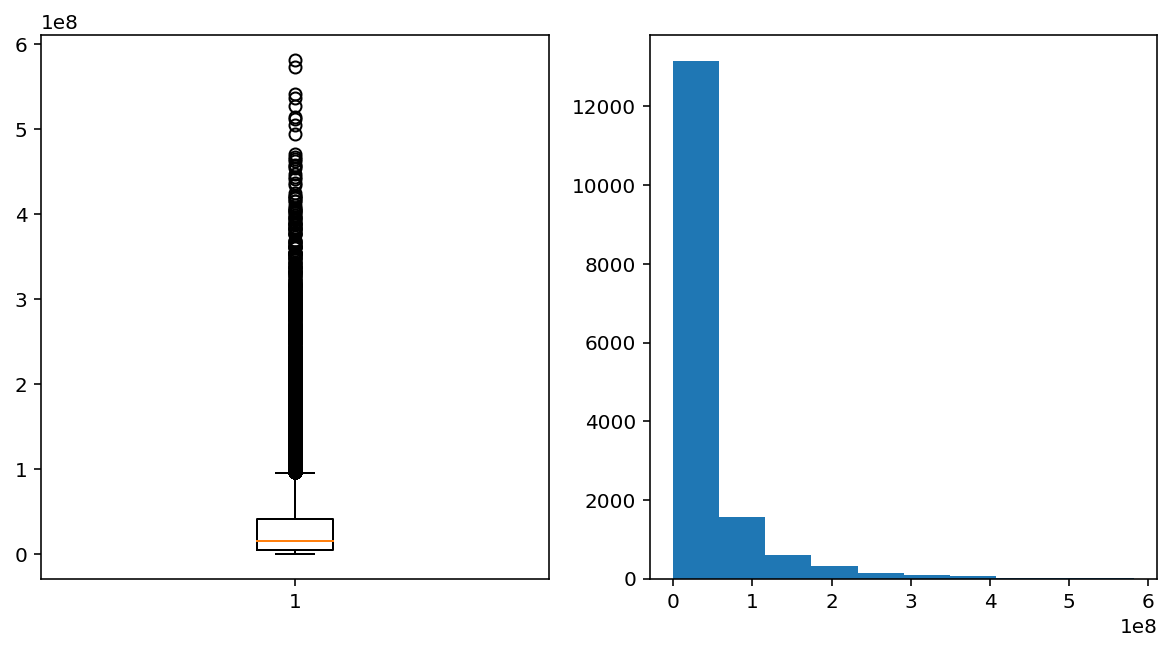

In [16]:
# Total_Sales 그래프 확인
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df.Total_Sales);
plt.subplot(1,2,2)
plt.hist(df.Total_Sales);

## **7.분석 및 결과**

### **7.1 지역별로 선호하는 게임장르**

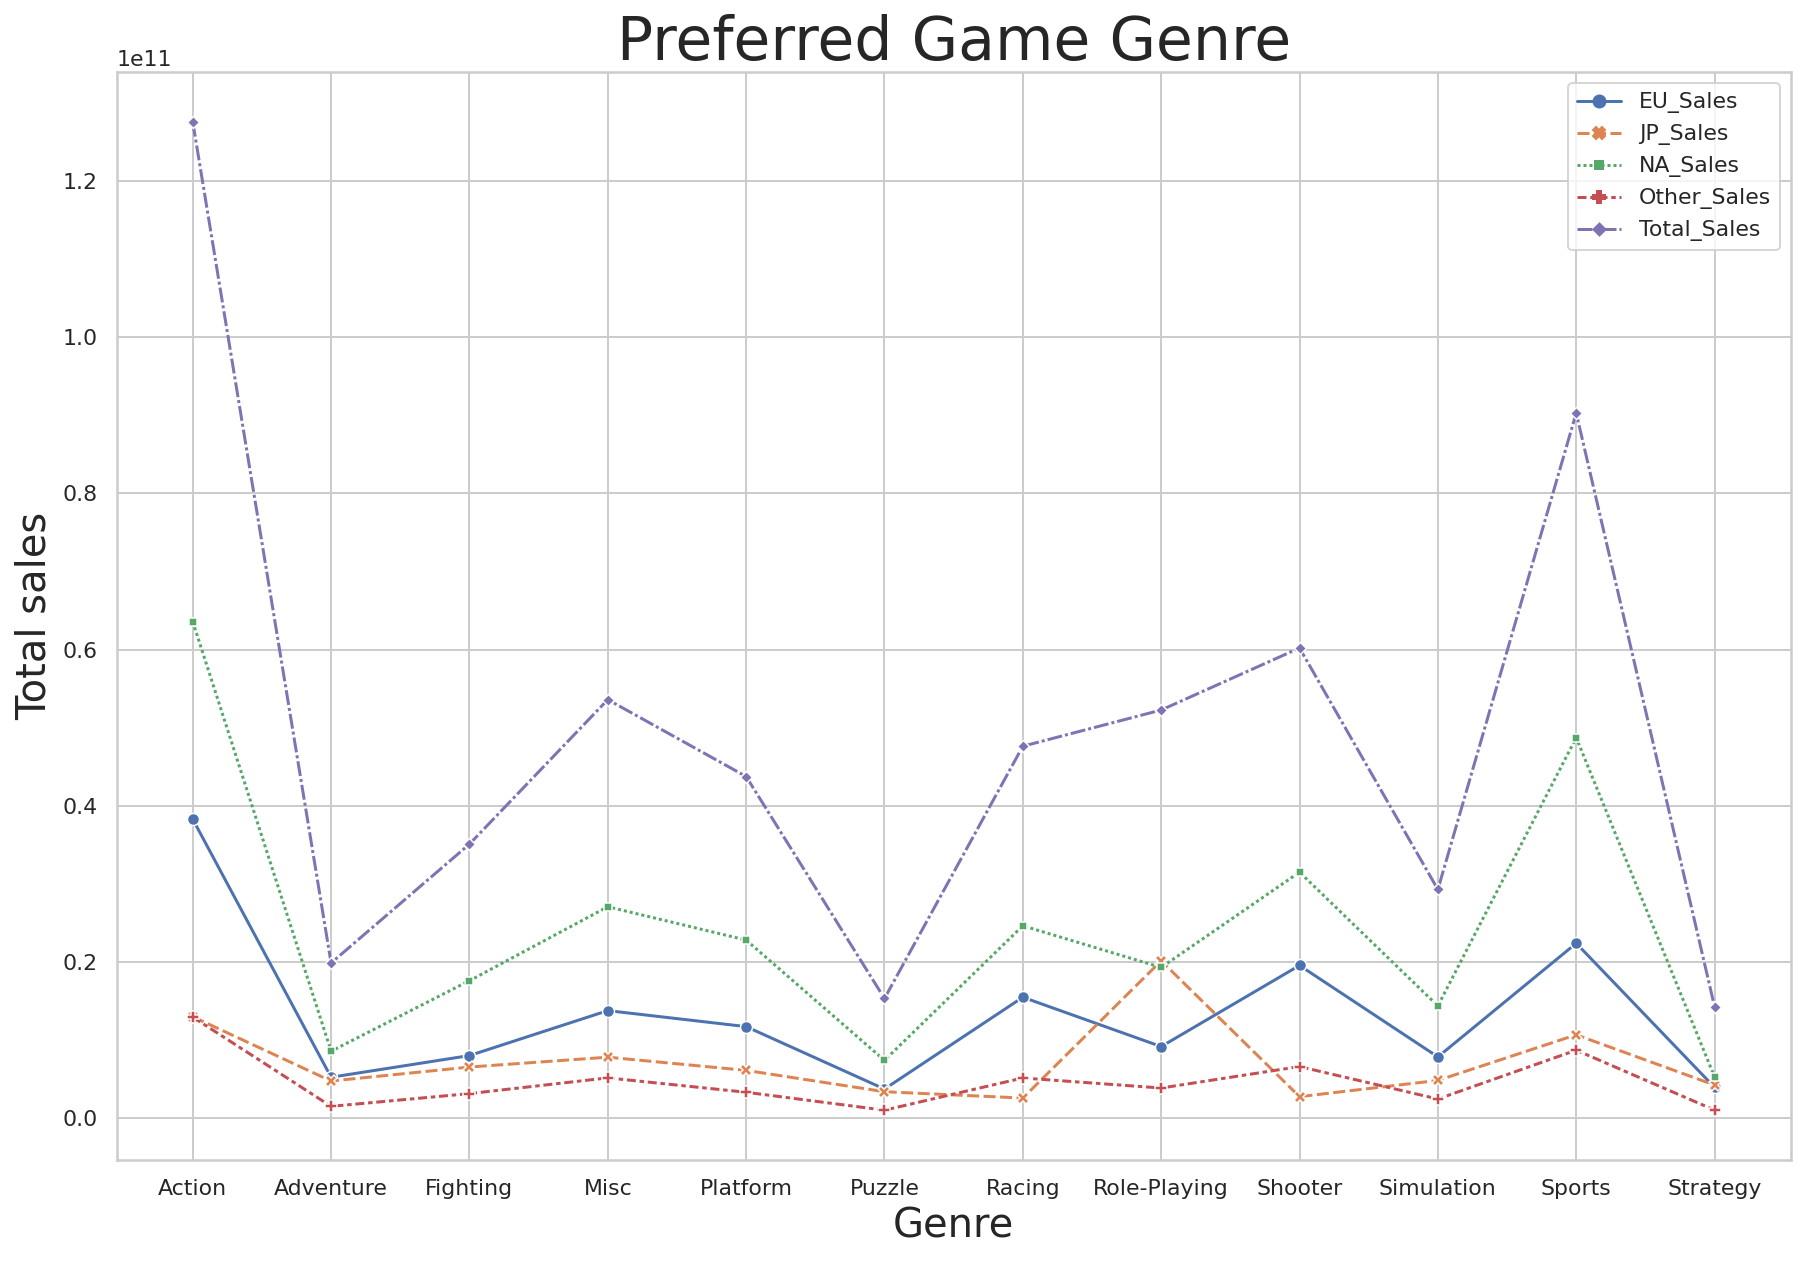

In [17]:
df_genre = df.groupby(by=['Genre'])['Total_Sales'].sum() # 전 대륙 선호하는 게임 장르
df_genre = df_genre.reset_index()

df_genre_na = df.groupby(by=['Genre'])['NA_Sales'].sum() # 북미 선호하는 게임 장르
df_genre_na = df_genre_na.reset_index()

df_genre_eu = df.groupby(by=['Genre'])['EU_Sales'].sum() # 유럽 선호하는 게임 장르
df_genre_eu = df_genre_eu.reset_index()

df_genre_jp = df.groupby(by=['Genre'])['JP_Sales'].sum() # 일본 선호하는 게임 장르
df_genre_jp = df_genre_jp.reset_index()

df_genre_ot = df.groupby(by=['Genre'])['Other_Sales'].sum() # 일본 선호하는 게임 장르
df_genre_ot = df_genre_ot.reset_index()

df_genre = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_ot)
df_genre = df_genre.set_index("Genre")

sns.set(style='whitegrid')
plt.figure(figsize=(15, 10))
plt.title("Preferred Game Genre", fontsize=30)
plt.xlabel("Genre", fontsize=20)
plt.ylabel("Total sales", fontsize=20)

sns.lineplot(data=df_genre, markers=True);

- **NA_Sales**
  - Action 22% 
  -  Sports 17%
- **EU_Sales**:
  - Action 24%
  -  Sports 14%
- **JP_Sales**:
  -  Role-Playing 23%
  -  Action 15%
- **Other_Sales**:
  -  Action 24%
  -  Sports 16%
- **Total_Sales**:
  -  Action 22%
  -  Sports 15%

1. 전체적으로 Action, Sports, Shooter 순으로 장르를 선호하는 것을 알 수 있습니다. 
2. 특히 일본 지역의 경우 Role-Playing 장르가 인기 있는 것을 확인 할 수 있습니다. 

이것을 통계적으로 의미있는 차이인지 검증해보겠습니다.

**"일본 지역에서 Role-Playing 장르가 특별하게 더 인기있는 장르인가?**

**"다른 모든 지역과 일본 지역의 출고량 분포가 다른가?"**

In [18]:
# 장르별로 그룹화 
group = df.groupby('Genre')
# 전체 출고량에서 각 장르의 출고량이 차지하는 비율 
Total = [group['Total_Sales'].sum()[i] / (group['Total_Sales'].sum()).sum() for i in range(0,len(group))] 
# 일본 출고량에서 각 장르의 출고량이 차지하는 비율 
JP = [group['JP_Sales'].sum()[i] / (group['JP_Sales'].sum()).sum() *100 for i in range(0,len(group))] 

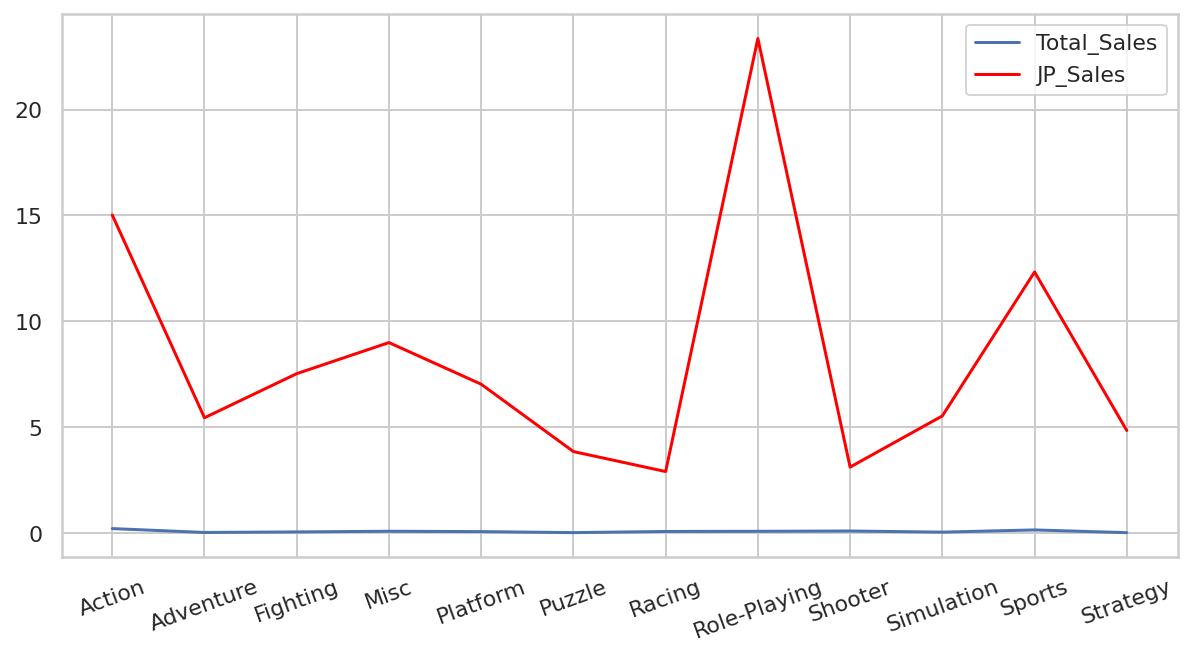

In [19]:
fig = plt.figure(figsize=(10,5))
plt.plot(Total, label='Total_Sales')
plt.plot(JP, label='JP_Sales', color = 'red')
plt.legend()
x = range(0,12)
labels = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing',
          'Role-Playing','Shooter','Simulation','Sports','Strategy']
plt.xticks(x ,labels, rotation =20);

In [20]:
# samplt t- test
group = df.groupby('Genre')
Total = [group['Total_Sales'].sum()[x]/(group['Total_Sales'].sum()).sum() for x in range(0,len(group))]
JP = [group['JP_Sales'].sum()[x]/(group['JP_Sales'].sum()).sum() for x in range(0,len(group))]

statistic , p_value = stats.chisquare(Total,JP)

#print('statistic: ', stats.ttest_ind(Total,JP,alternative='greater')[0] )
#print('pvalue: ', stats.ttest_ind(Total,JP,alternative='greater')[1] )


print('statistic:',statistic)
print('p_value:',p_value)

statistic: 0.40851332542204244
p_value: 0.9999995302696779


귀무 가설: 일본 지역에서 Role-Playing의 장르의 출고량의 비율은 다른 지역과 같다.

대립 가설: 일본 지역에서 Role-playing 장르의 출고량의 비율이 다른 장르보다 더 많다.

- p-vvalue가 0.05보다 큰 0.99이므로 귀무 가설을 기각할 수 없습니다.
-  일본 지역과 전체 출고량의 비율 차이는 없습니다. 
- 즉, 일본지역과 전체 출고량의 비율을 비교했을 때 특별히 선호하는 장르는 없는 것을 알 수 있습니다. 

앞서 보았듯이 그래프에서는 일본 지역에 Role-playing 장르에 선호를하는 것으로 나타났으나 카이제곱 검정을 시행한 결과 통계적으로 유의미한 차이는 없었습니다. 

**따라서 일본 지역에서 선호하는 장르가 있다고 볼 수 없습니다.** 

### **7.2 장르와 플랫폼별 연도에 따른 트랜드 변화**

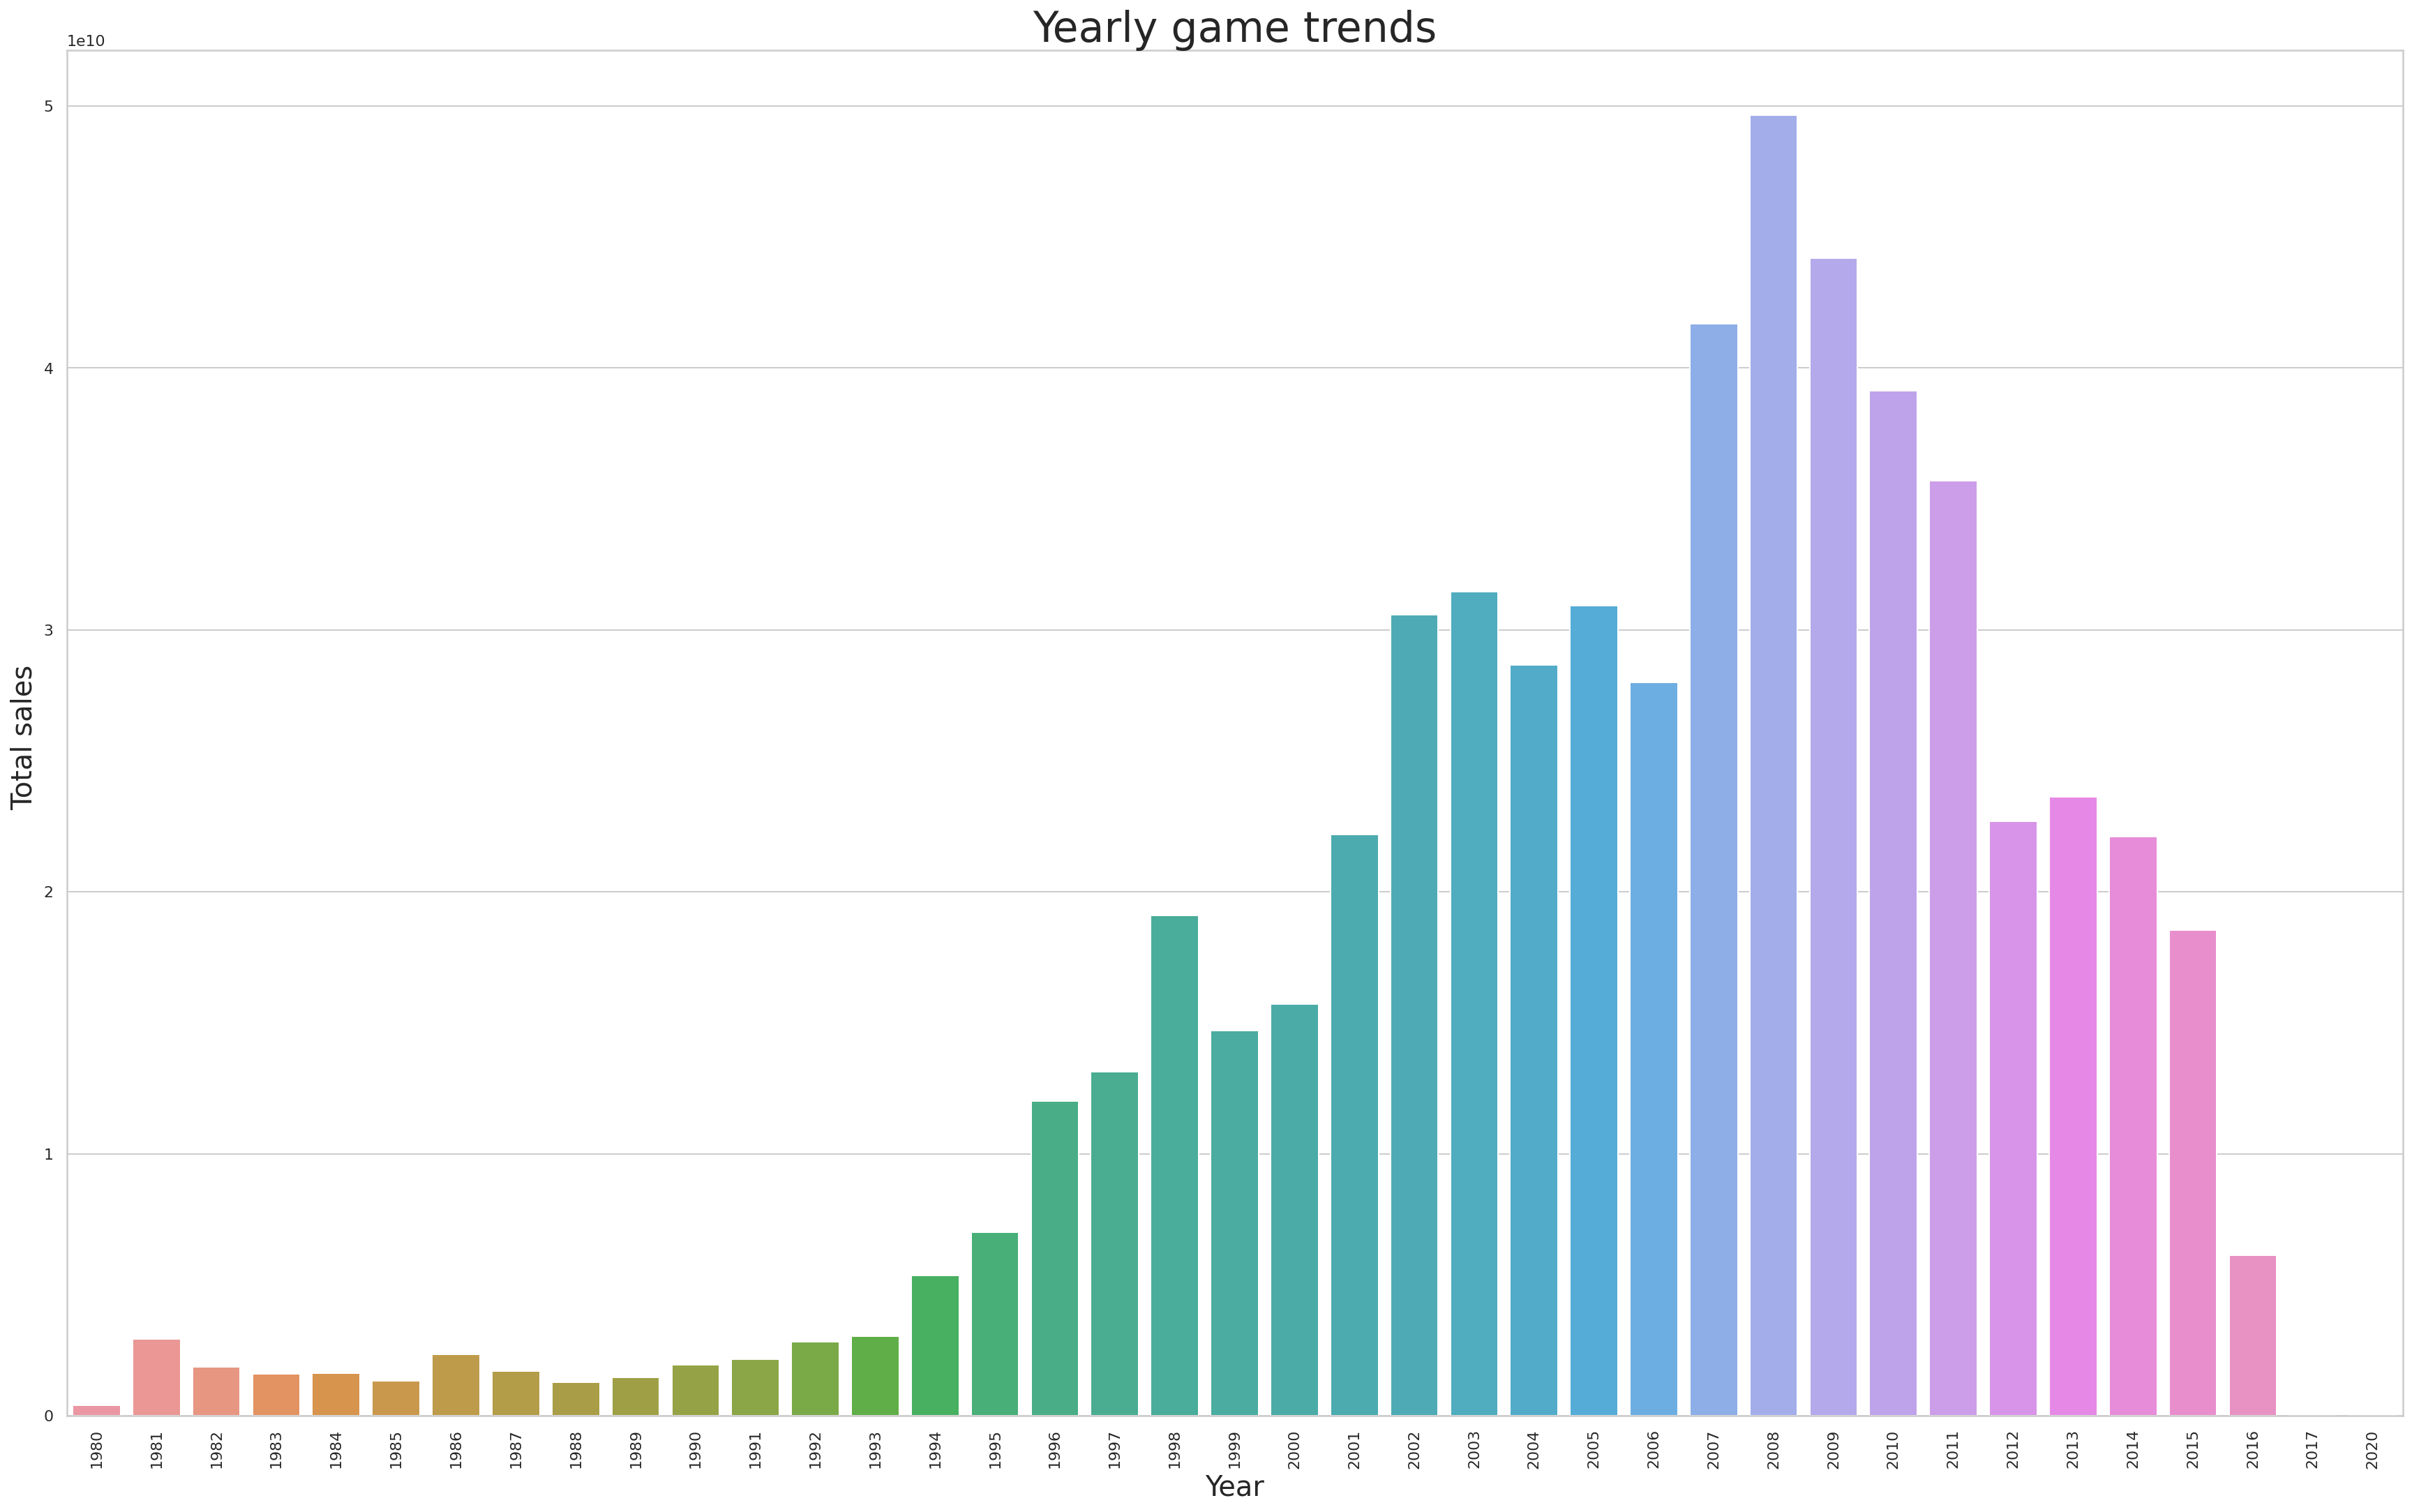

In [21]:
# 총 출고량의 연도별 변화 
years = df.groupby(['Year']).sum()
plt.figure(figsize=(30, 18))
g = sns.barplot(x=years.index, y='Total_Sales', data=years)
plt.title("Yearly game trends", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total sales ", fontsize=20)

plt.xticks(rotation=90)
plt.show()

- 1980~1990년대 : 비디오 게임이 팔리기 시작
- 1990~2000년대 : 컴퓨터의 발달과 같이 비디오 게임의 성장 초기 단계
- 2000~2010년대 : 게임 시장의 활황기 이후 조금씩 침체 시작 
- 2010~2020년대 : 본격적인 쇠퇴기

### **7.3 10년 단위 장르별 트렌드**

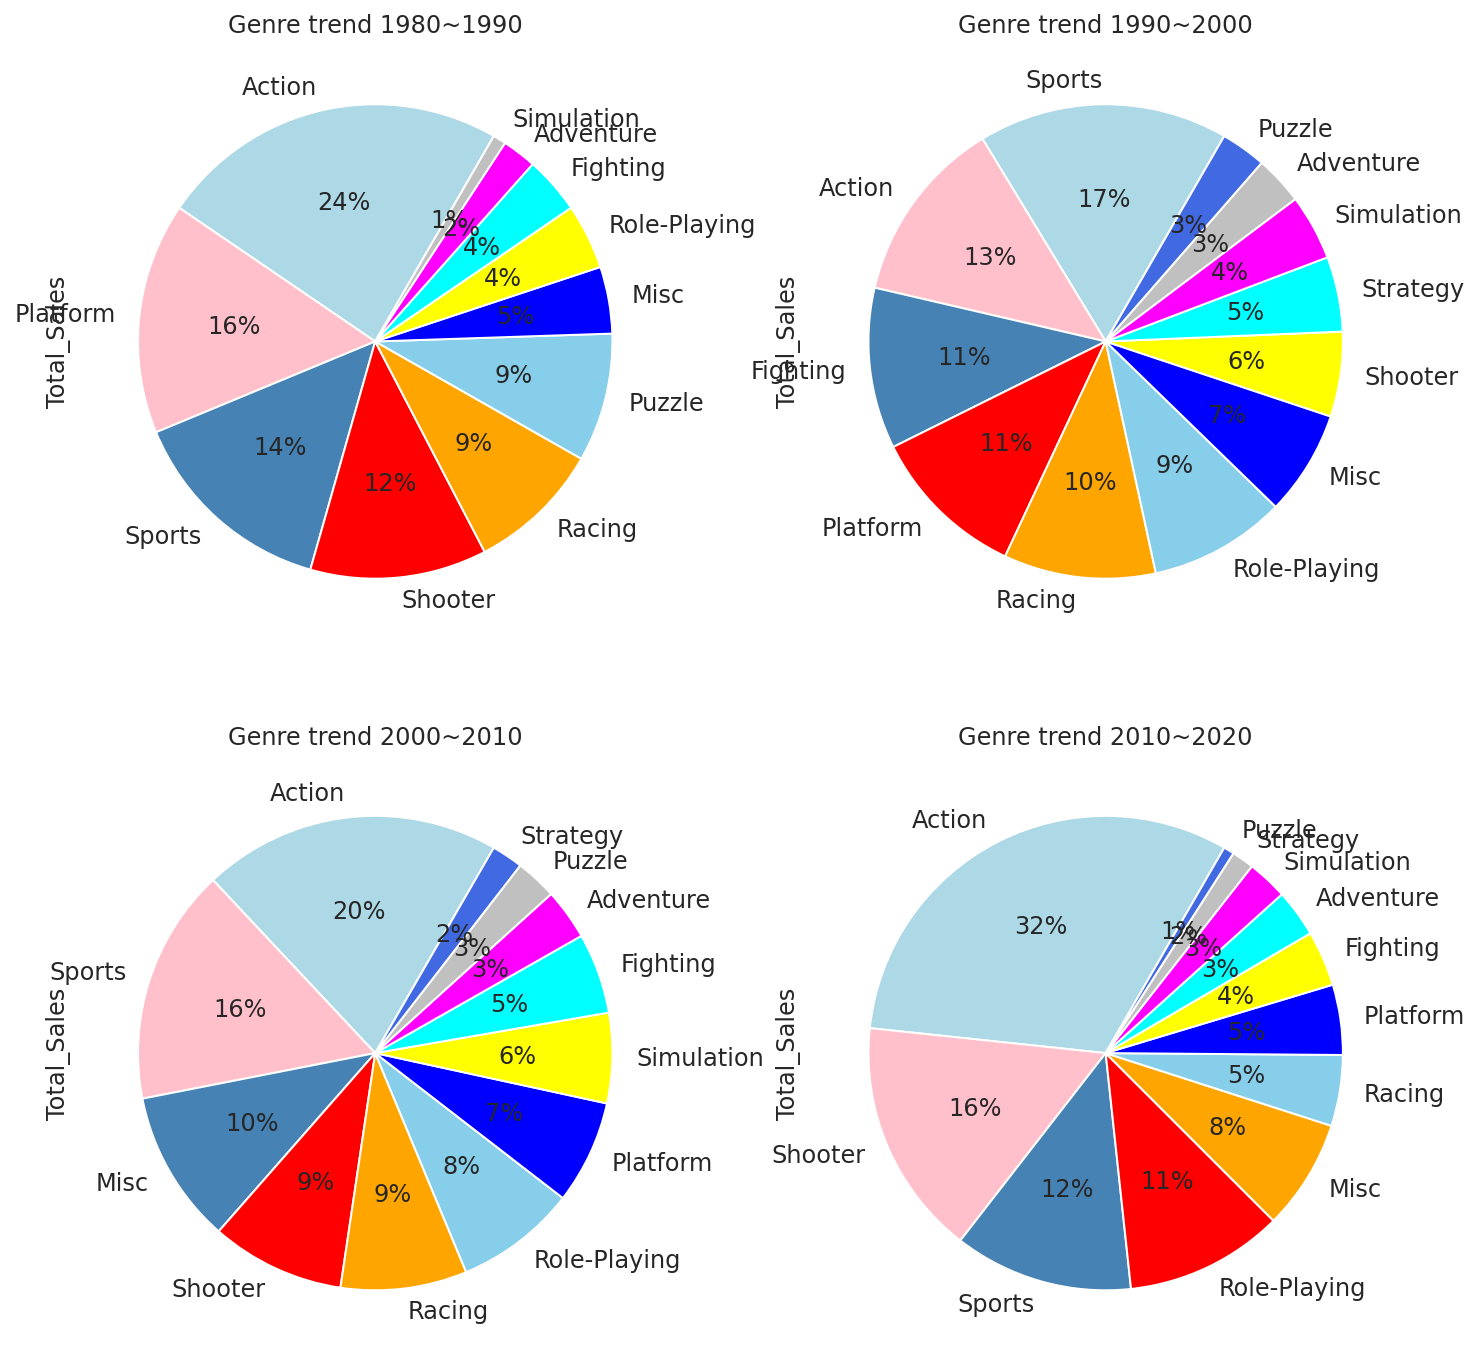

In [22]:
#10년단위 장르별 출고량 
colors = ['lightblue','pink', 'steelblue','red','orange', 'skyblue', 'blue', 'yellow',
          'cyan', 'magenta', 'silver','royalblue']

#1980~1990년대 장르별 출고량 변화
plt.subplot(2,2,1)
df[df['Year']<= 1990].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).plot(kind='pie', y= v,
                                 fontsize = 12,figsize = (12,12), autopct='%1.0f%%', colors=colors,startangle=60,
                                  title = 'Genre trend 1980~1990');

#1990~2000년대 장르별 출고량 변화
plt.subplot(2,2,2)
df[(df['Year'] > 1990)&(df['Year'] <= 2000)].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).plot(kind='pie', y= v,
                                 fontsize = 12,figsize = (12,12), autopct='%1.0f%%', colors=colors,startangle=60,
                                  title = 'Genre trend 1990~2000');

#2000~2010년대 장르별 출고량 변화
plt.subplot(2,2,3)
df[(df['Year'] > 2000)&(df['Year'] <= 2010)].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).plot(kind='pie', y= v,
                                 fontsize = 12,figsize = (12,12), autopct='%1.0f%%', colors=colors,startangle=60,
                                  title = 'Genre trend 2000~2010');
                          
#2010~2020년대 장르별 출고량 변화
plt.subplot(2,2,4)
df[(df['Year'] > 2010)&(df['Year'] <= 2020)].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).plot(kind='pie', y= v,
                                 fontsize = 12,figsize = (12,12), autopct='%1.0f%%', colors=colors,startangle=60,
                                  title = 'Genre trend 2010~2020');

### **7.4 10년 단위 플랫폼별 트렌드**

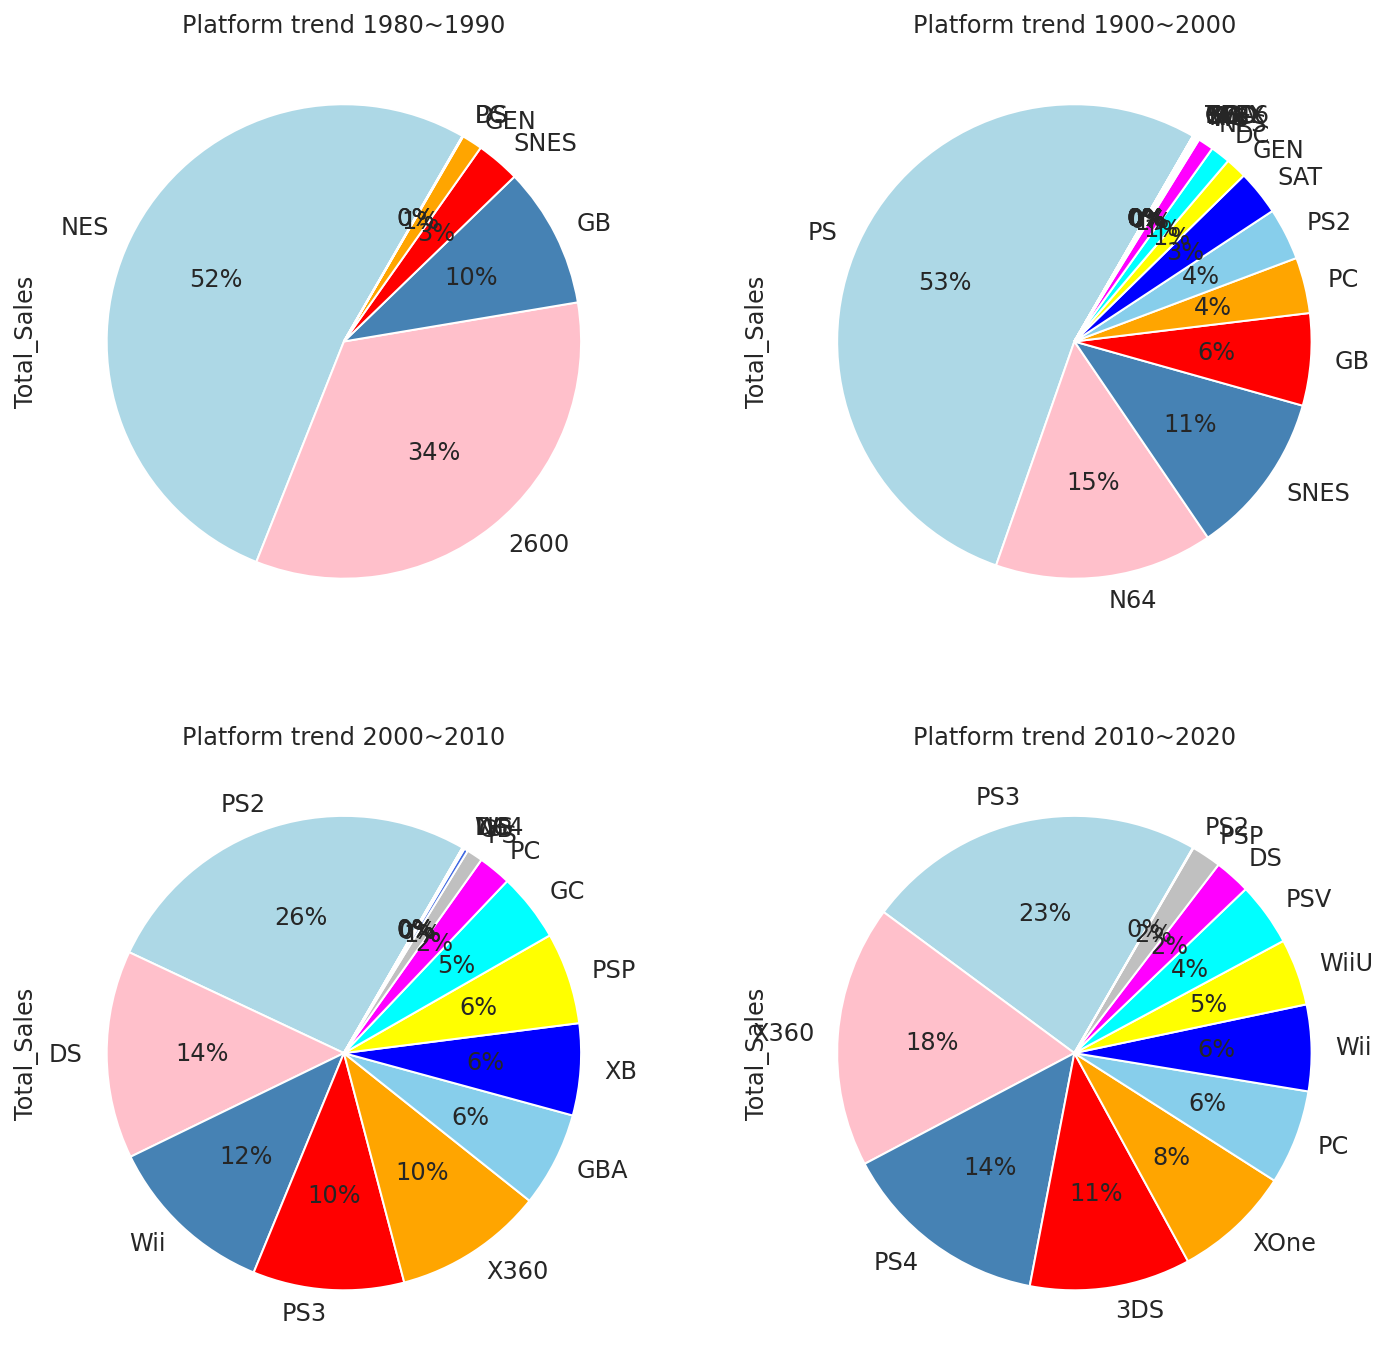

In [23]:
#10년단위 플랫폼별 출고량 
colors = ['lightblue','pink', 'steelblue','red','orange', 'skyblue', 'blue', 'yellow',
          'cyan', 'magenta', 'silver','royalblue']

#1980~1990년대 플랫폼별 출고량 변화
plt.subplot(2,2,1)
df[df['Year']<= 1990].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).plot(kind='pie', y= v,
                                 fontsize = 12,figsize = (12,12), autopct='%1.0f%%', colors=colors,startangle=60,
                                  title = 'Platform trend 1980~1990');

#1990~2000년대 플랫폼별 출고량 변화
plt.subplot(2,2,2)
df[(df['Year'] > 1990)&(df['Year'] <= 2000)].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).plot(kind='pie', y= v,
                                 fontsize = 12,figsize = (12,12), autopct='%1.0f%%', colors=colors,startangle=60,
                                  title = 'Platform trend 1900~2000');

#2000~2010년대 플랫폼별 출고량 변화
plt.subplot(2,2,3)
df[(df['Year'] > 2000)&(df['Year'] <= 2010)].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).plot(kind='pie', y= v,
                                 fontsize = 12,figsize = (12,12), autopct='%1.0f%%', colors=colors,startangle=60,
                                  title = 'Platform trend 2000~2010');
                          
#2010~2020년대 플랫폼별 출고량 변화
plt.subplot(2,2,4)
df[(df['Year'] > 2010)&(df['Year'] <= 2020)].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).plot(kind='pie', y= v,
                                 fontsize = 12,figsize = (12,12), autopct='%1.0f%%', colors=colors,startangle=60,
                                  title = 'Platform trend 2010~2020');

- **1980~1990년**
    - Genre: Action 장르가 가장 출고량이 높습니다.
    - Platform:  NES 플랫폼이 52% 절반이상을 차지하고 2600까지 포함하면 86% 대부분을 차지합니다.
- **1990~2000년**
    - Genre:  Sports 장르가 Action 장르를 앞지르고 다양한 장르에서 소비가 시작됩니다.
    - Platform: PS 플랫폼이 53% 절반을 차지합니다.
- **2000~2010년**
    - Genre: Action, sports 장르가 인기를 얻으며 주류 문화를 만들어냅니다.
    - Platform: PS2 .DS,Wii 다양한 플랫폼을 소비합니다.
- **2010~2020년**
    - Genre:  Action 장르는 2000년대 인기로 이어받아 1순위로 굳어지고 2위는 Shooter, 3위는 Sports가 차지합니다.  전체적인 추세는 감소합니다.
    - Platform:  PS2에 이어 받아 PS3로 세대 교체를 성공합니다.  
    
가장 비중이 큰 1위는 lightblue 입니다.


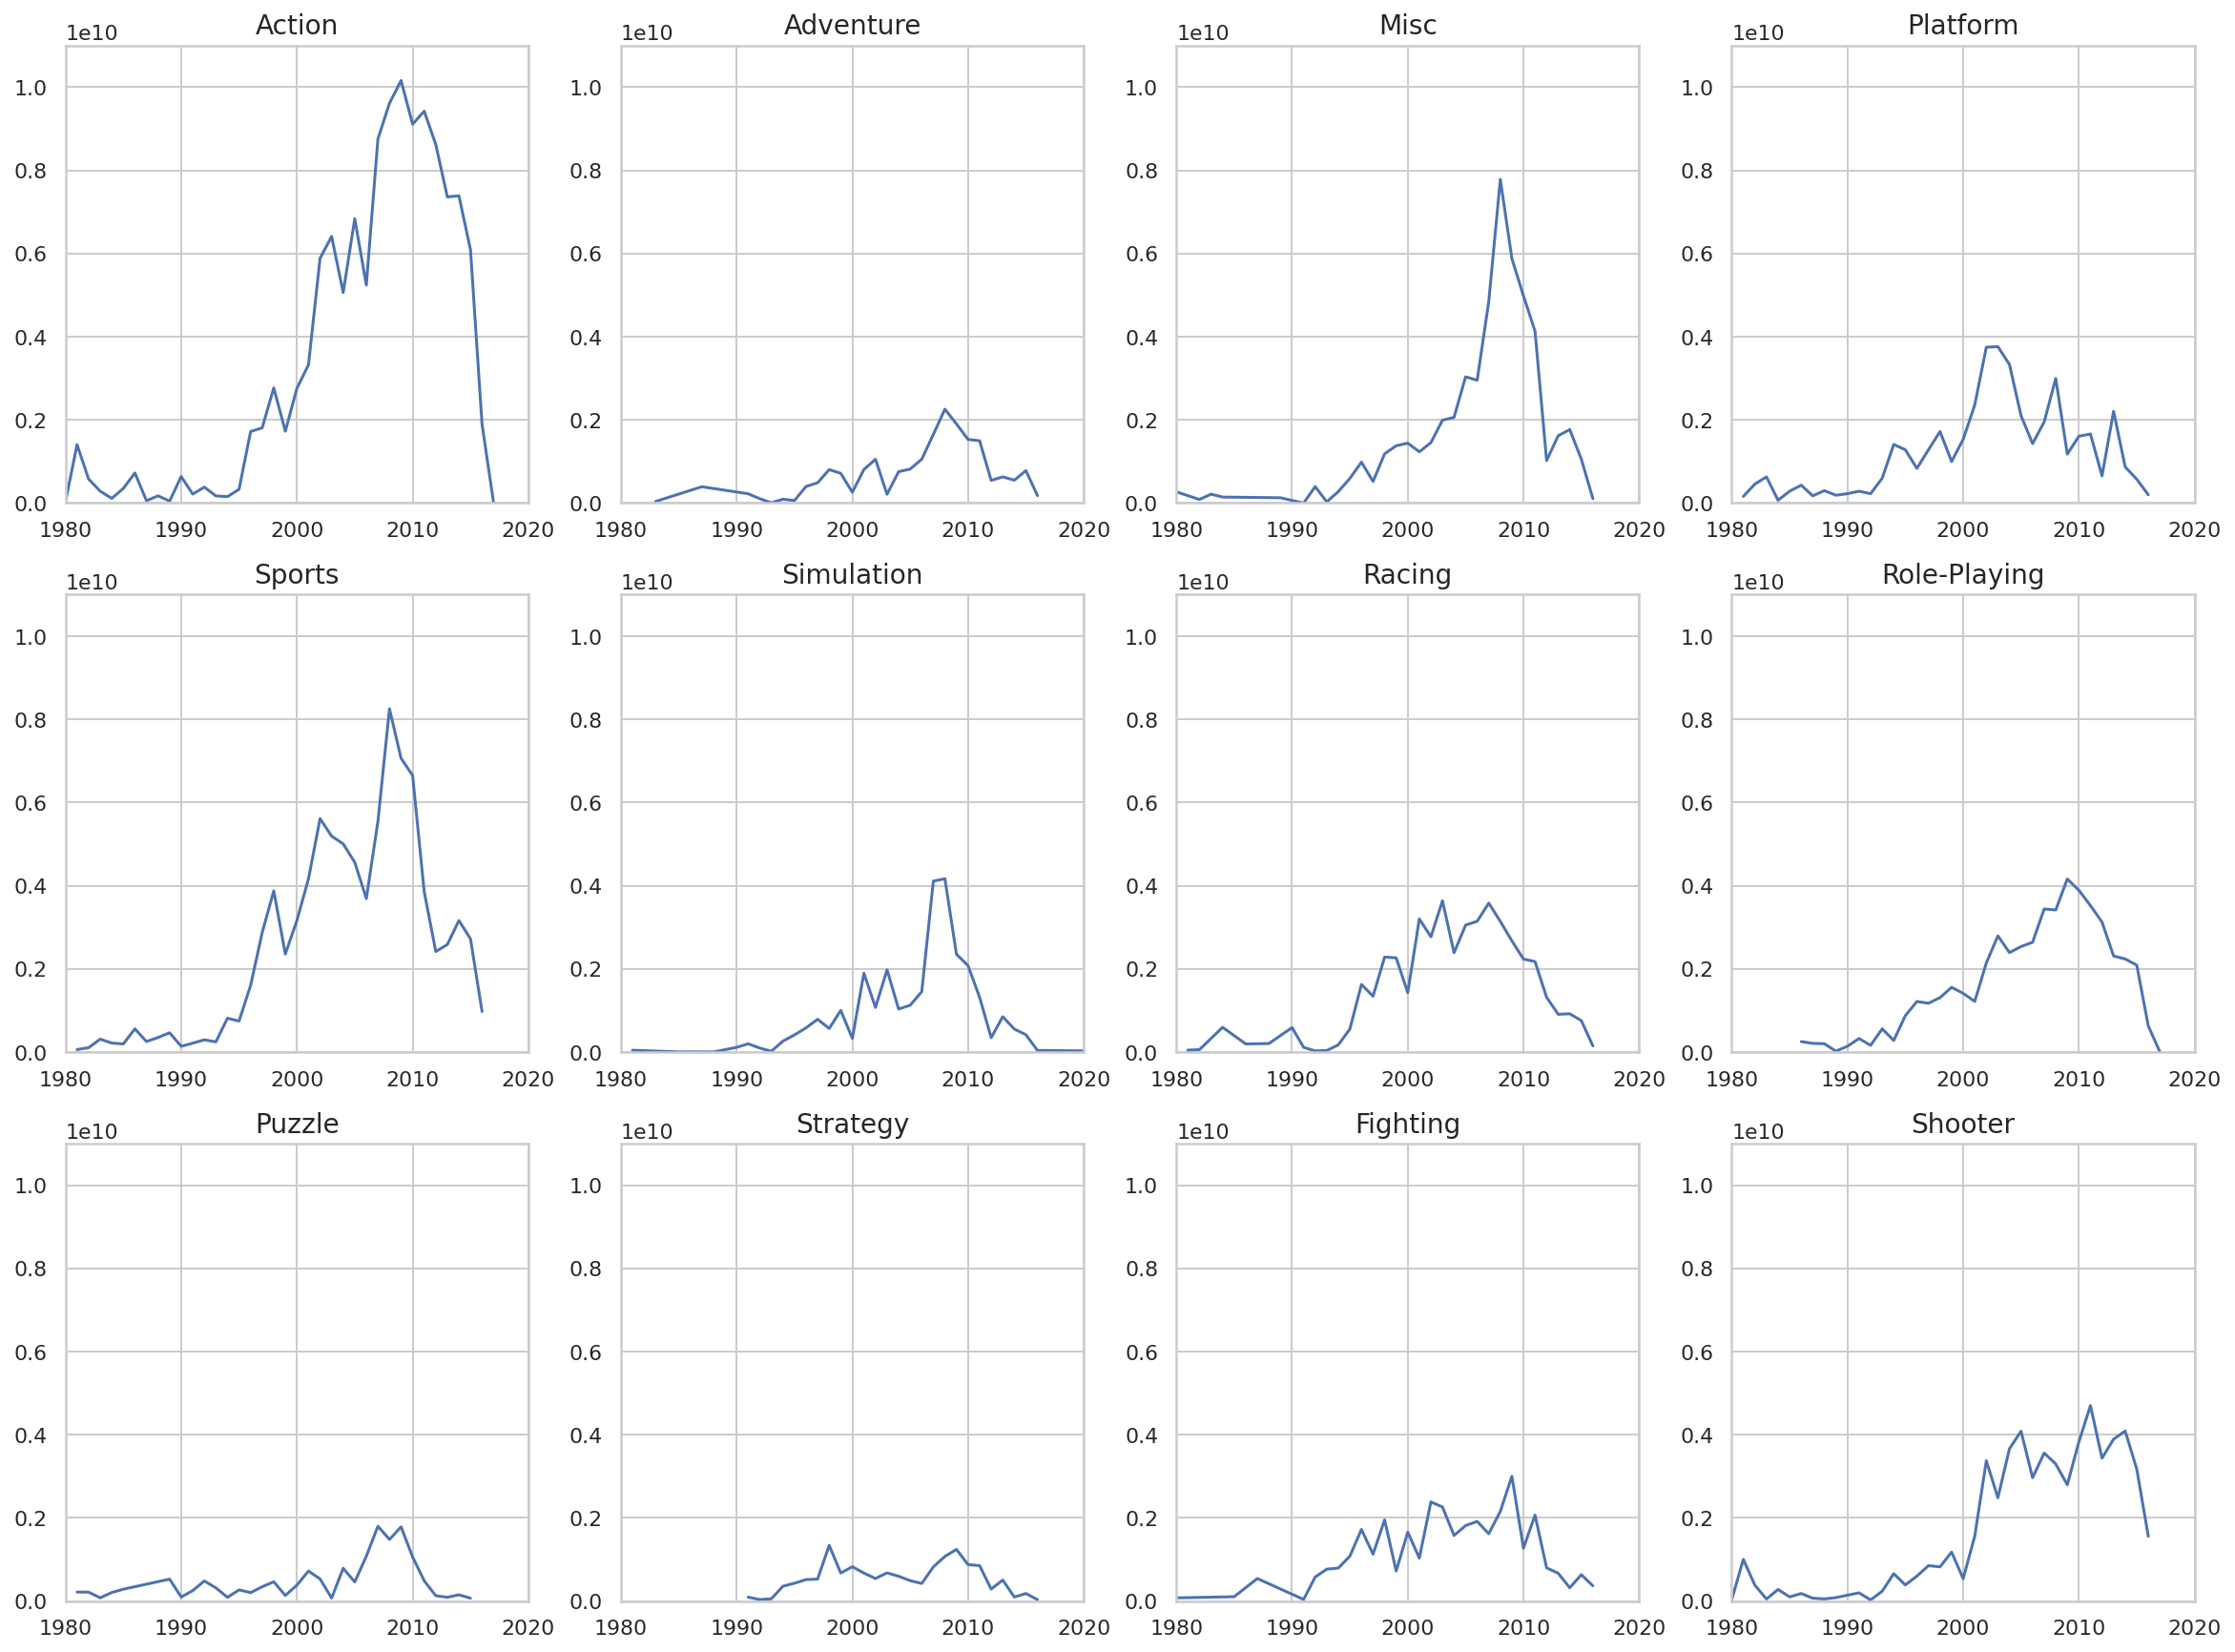

In [24]:
# 장르별 연도에 따른 출고량 트랜드 
plt.figure(figsize=(20,15))
col = df['Genre'].unique()
for i, v in enumerate(col):
  plt.subplot(3,4,1+i)
  plt.plot(df[df['Genre'] == col[i]].groupby('Year')['Total_Sales'].sum())
  plt.title(str(v), fontsize= 14)
  plt.xlim(1980,2020)
  plt.ylim(0,11000000000)
plt.show();

- 1980~1990년에서는 2000년대 이후보다 비교적 모든 장르의 출고량 적은 것을 알 수 있습니다.
- 1990~2000년대에서부터 Action,music,Platform,Racing,Role-Playing 등 다양한 장르가 인기 있는 모습을 볼 수 있습니다.
- 2000년대에서는 Action,Sports,Music,Shooer 장르의 인기를 폭발적으로 끌면서 시장을 장악한 것을 알 수 있습니다.

### **7.5 연대별 트랜드 - 가설 검증**

위 그래프들을 통해 연대별 인기있는 장르가 다르다는 것을 볼 수 있습니다.

즉,**연대별로 비디오 게임의 트랜드가 변화한다**는 것을 짐작할 수 있습니다.

그렇다면 이 가설이 통계적으로도 유의한지 검정봅시다.

In [25]:
# 연대별 트랜드와 장르 - 가설 검증 
t = df[df['Year'] <= 1990].groupby('Genre')['Total_Sales'].sum()
t['Strategy'] = 0

hy = pd.DataFrame([t,
                df[(df['Year'] > 1990)&(df['Year'] <= 2000)].groupby('Genre')['Total_Sales'].sum(),
                df[(df['Year'] > 2000)&(df['Year'] <= 2010)].groupby('Genre')['Total_Sales'].sum(),
                df[(df['Year'] > 2010)&(df['Year'] <= 2020)].groupby('Genre')['Total_Sales'].sum()],
                index = ['1980','1990','2000','2010'])

print('\nchi_square statistics:',stats.chi2_contingency(hy)[0])
print('p-value:',stats.chi2_contingency(hy)[1])
t = df[df['Year'] <= 1990].groupby('Genre')['Total_Sales'].sum()
t['Strategy'] = 0

hy = pd.DataFrame([t,
                df[(df['Year'] > 1990)&(df['Year'] <= 2000)].groupby('Genre')['Total_Sales'].sum(),
                df[(df['Year'] > 2000)&(df['Year'] <= 2010)].groupby('Genre')['Total_Sales'].sum(),
                df[(df['Year'] > 2010)&(df['Year'] <= 2020)].groupby('Genre')['Total_Sales'].sum()],
                index = ['1980','1990','2000','2010'])

print('\nchi_square statistics:',stats.chi2_contingency(hy)[0])
print('p-value:',stats.chi2_contingency(hy)[1])


chi_square statistics: 44281271965.33768
p-value: 0.0

chi_square statistics: 44281271965.33768
p-value: 0.0


**귀무가설 (H0): 비디오 게임 장르의 트랜드는 변하지 않는다.**

**대립가설 (H1): 비디오 게임 장르의 트랜드는 변한다.**

2 sample 카이제곱 검정을 시행한 결과 p-value값이 0이 나왔다.비디오 게임장르에서 트랜드가 없다는 귀무가설을 기각합니다.

즉, **비디오게임 시장에서 게임장르의 트랜드는 계속해서 변화**하는 것으로 판단할 수 있습니다.

### **7.6 2000~2020년 출고량이 많은 게임들의 특징**

- 연대별 트랜드가 다른다는 것을 알게 되었습니다. 이제 연대별로 나누어서 분석해보겠습니다. 

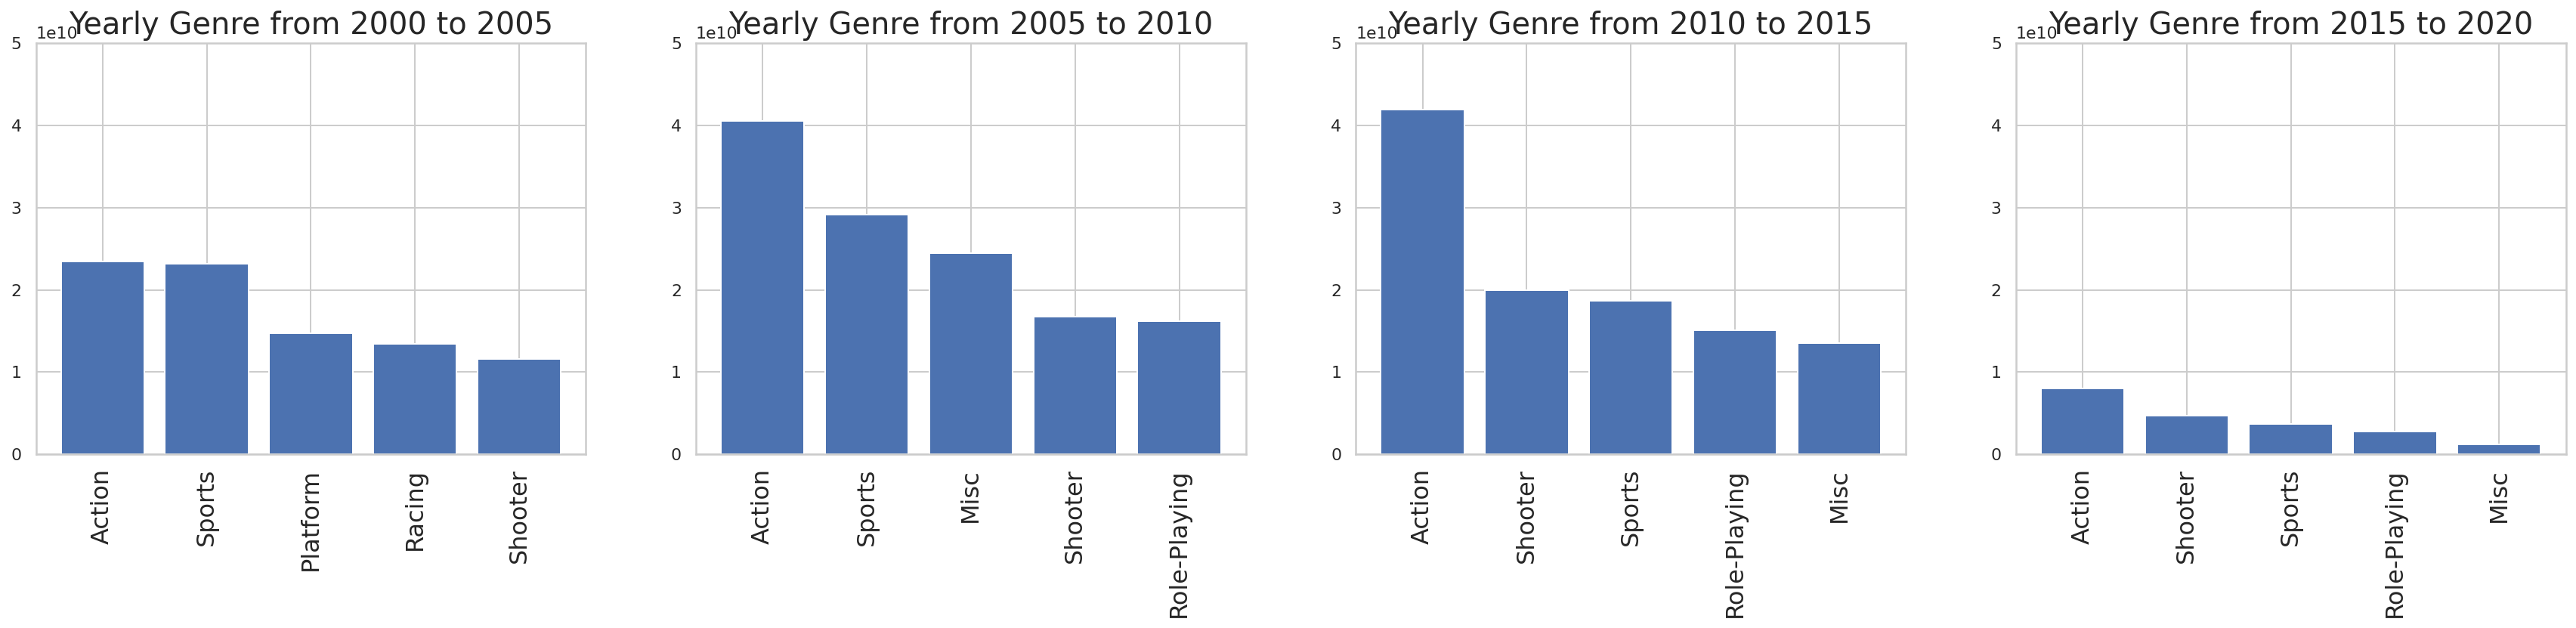

In [26]:
# 연도별 장르별 매출 순위 

years00 = df[(df['Year']>= 2000) &(df['Year'] < 2005)]
years05 = df[(df['Year']>= 2005) &(df['Year'] < 2010)]
years10 = df[(df['Year'] >= 2010) & (df['Year']<2015)]
years15 = df[df['Year'] >= 2015]
#  2000~2005 장르별 매출 순위
Genre00 = years00.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).head(5)
#  2005~2010 장르별 매출 순위 
Genre05 = years05.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).head(5)
#  2010~2015 장르별 매출 순위 
Genre10 = years10.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).head(5)
#  2015~2020 장르별 매출 순위 
Genre15 =years15.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).head(5)

fig = plt.subplots(1,4, figsize=(30, 5))
plt.subplot(1,4,1)
plt.bar(Genre00.index,Genre00)
plt.ylim(0,50000000000)
plt.title('Yearly Genre from 2000 to 2005', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);

plt.subplot(1,4,2)
plt.bar(Genre05.index,Genre05)
plt.ylim(0,50000000000)
plt.title('Yearly Genre from 2005 to 2010', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);

plt.subplot(1,4,3)
plt.bar(Genre10.index,Genre10)
plt.ylim(0,50000000000)
plt.title('Yearly Genre from 2010 to 2015', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);


plt.subplot(1,4,4)
plt.bar(Genre15.index,Genre15)
plt.ylim(0,50000000000)
plt.title('Yearly Genre from 2015 to 2020', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);

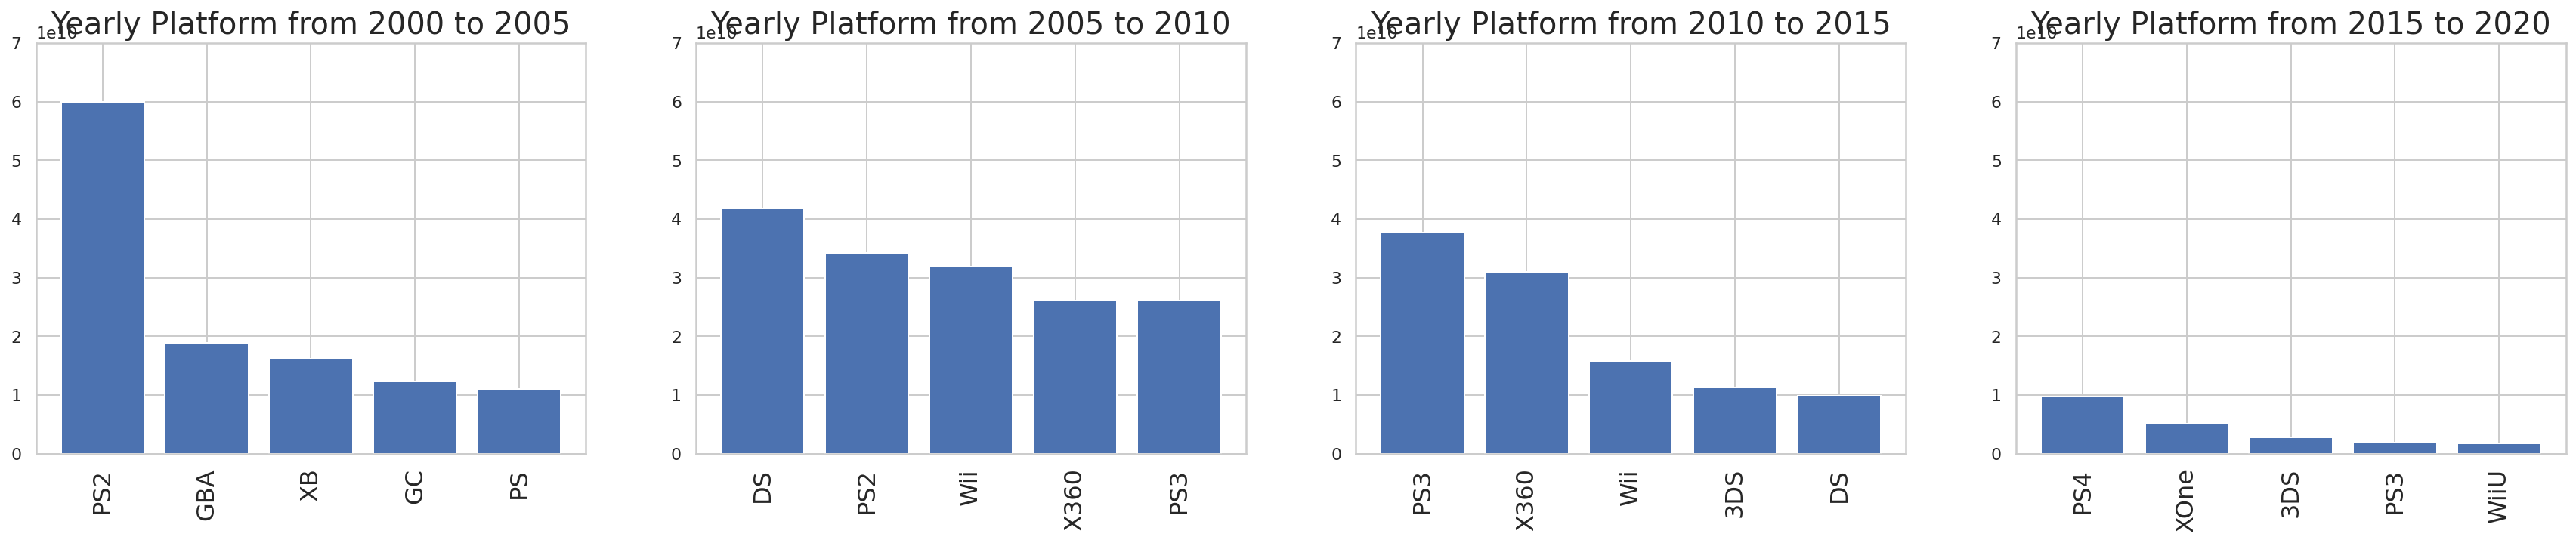

In [27]:
# 연도별 플랫폼별 매출 순위 

years00 = df[(df['Year']>= 2000) &(df['Year'] < 2005)]
years05 = df[(df['Year']>= 2005) &(df['Year'] < 2010)]
years10 = df[(df['Year'] >= 2010) & (df['Year']<2015)]
years15 = df[df['Year'] >= 2015]
#  2000~2005 플랫폼별 매출 순위
Platform00 = years00.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(5)
#  2005~2010 플랫폼별 매출 순위 
Platform05 = years05.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(5)
#  2010~2015 플랫폼별 매출 순위 
Platform10 = years10.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(5)
#  2015~2020 플랫폼별 매출 순위 
Platform15 =years15.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(5)

fig = plt.subplots(1,4, figsize=(30, 5))
plt.subplot(1,4,1)
plt.bar(Platform00.index,Platform00)
plt.ylim(0,70000000000)
plt.title('Yearly Platform from 2000 to 2005', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);

plt.subplot(1,4,2)
plt.bar(Platform05.index,Platform05)
plt.ylim(0,70000000000)
plt.title('Yearly Platform from 2005 to 2010', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);

plt.subplot(1,4,3)
plt.bar(Platform10.index,Platform10)
plt.ylim(0,70000000000)
plt.title('Yearly Platform from 2010 to 2015', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);


plt.subplot(1,4,4)
plt.bar(Platform15.index,Platform15)
plt.ylim(0,70000000000)
plt.title('Yearly Platform from 2015 to 2020', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);

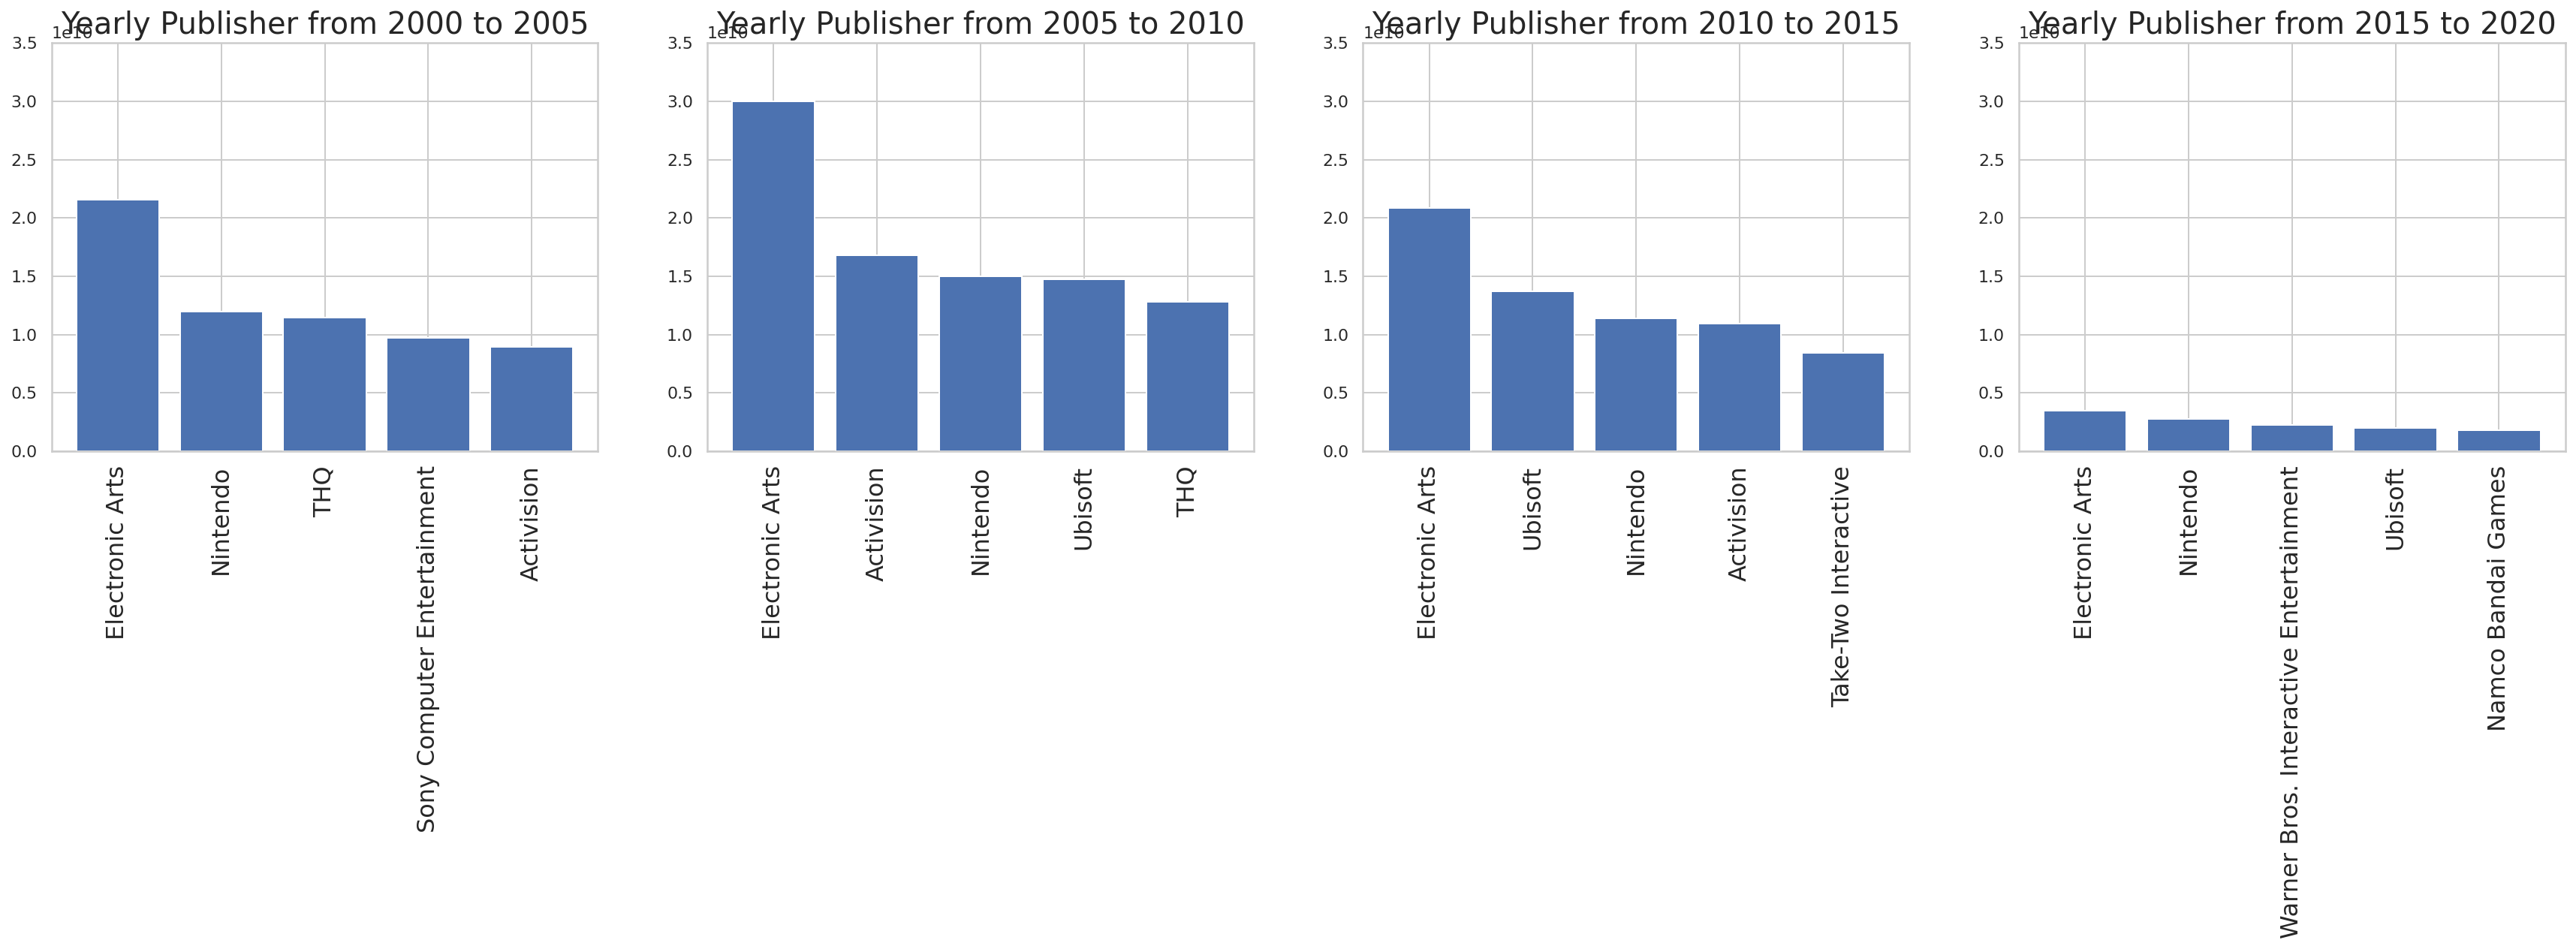

In [28]:
# 연도별 출판사별 매출 순위 

years00 = df[(df['Year']>= 2000) &(df['Year'] < 2005)]
years05 = df[(df['Year']>= 2005) &(df['Year'] < 2010)]
years10 = df[(df['Year'] >= 2010) & (df['Year']<2015)]
years15 = df[df['Year'] >= 2015]
#  2000~2005 출판사별 매출 순위
Publisher00 = years00.groupby('Publisher')['Total_Sales'].sum().sort_values(ascending=False).head(5)
#  2005~2010 출판사별 매출 순위 
Publisher05 = years05.groupby('Publisher')['Total_Sales'].sum().sort_values(ascending=False).head(5)
#  2010~2015 출판사별 매출 순위 
Publisher10 = years10.groupby('Publisher')['Total_Sales'].sum().sort_values(ascending=False).head(5)
#  2015~2020 출판사별 매출 순위 
Publisher15 =years15.groupby('Publisher')['Total_Sales'].sum().sort_values(ascending=False).head(5)

fig = plt.subplots(1,4, figsize=(30, 5))
plt.subplot(1,4,1)
plt.bar(Publisher00.index,Publisher00)
plt.ylim(0,35000000000)
plt.title('Yearly Publisher from 2000 to 2005', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);

plt.subplot(1,4,2)
plt.bar(Publisher05.index,Publisher05)
plt.ylim(0,35000000000)
plt.title('Yearly Publisher from 2005 to 2010', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);

plt.subplot(1,4,3)
plt.bar(Publisher10.index,Publisher10)
plt.ylim(0,35000000000)
plt.title('Yearly Publisher from 2010 to 2015', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);


plt.subplot(1,4,4)
plt.bar(Publisher15.index,Publisher15)
plt.ylim(0,35000000000)
plt.title('Yearly Publisher from 2015 to 2020', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);


정리하자면.

- **장르**
    - Action ,Shooter, Sport 순으로 3개 장르가 꾸준히 인기가 있음
- **플랫폼**
    - playstation의 플랫폼이 2→3→4 세대교체하면서 인기가 제일 많았고, MS의 X360 → Xone 으로 세대교체하면서 2위를 유지함
- **출판사**
    - 과거에는 Nintendo가 우세했으나 Electronic Arts에 밀려났고 현재는 비슷한 인기를 유지함.

- **현재 트렌드 게임 top3**
    - 장르: Action ,Shooter, Sports
    - 플랫폼: PS4,XOne,3DS
    - 출판사: Electronic Arts, Nintendo, Ubisoft

### **7.7 Electronic Arts에서 새롭게 게임을 출시한다면 어떨까?**
- top 3에서 먼저 가장 인기있는 출판사Electronic Arts 선택하고 다음 분석을 진행했습니다. 


그럼 이제 Electronic Arts 출판사에서 **어떤 플랫폼, 장르, 지역**를 만들어야할까요?

또한 이외에도 Electronic Arts 출판사의 **연도별 출고량** 보고 출판 시기를 생각해 볼 수 있을 것입니다.

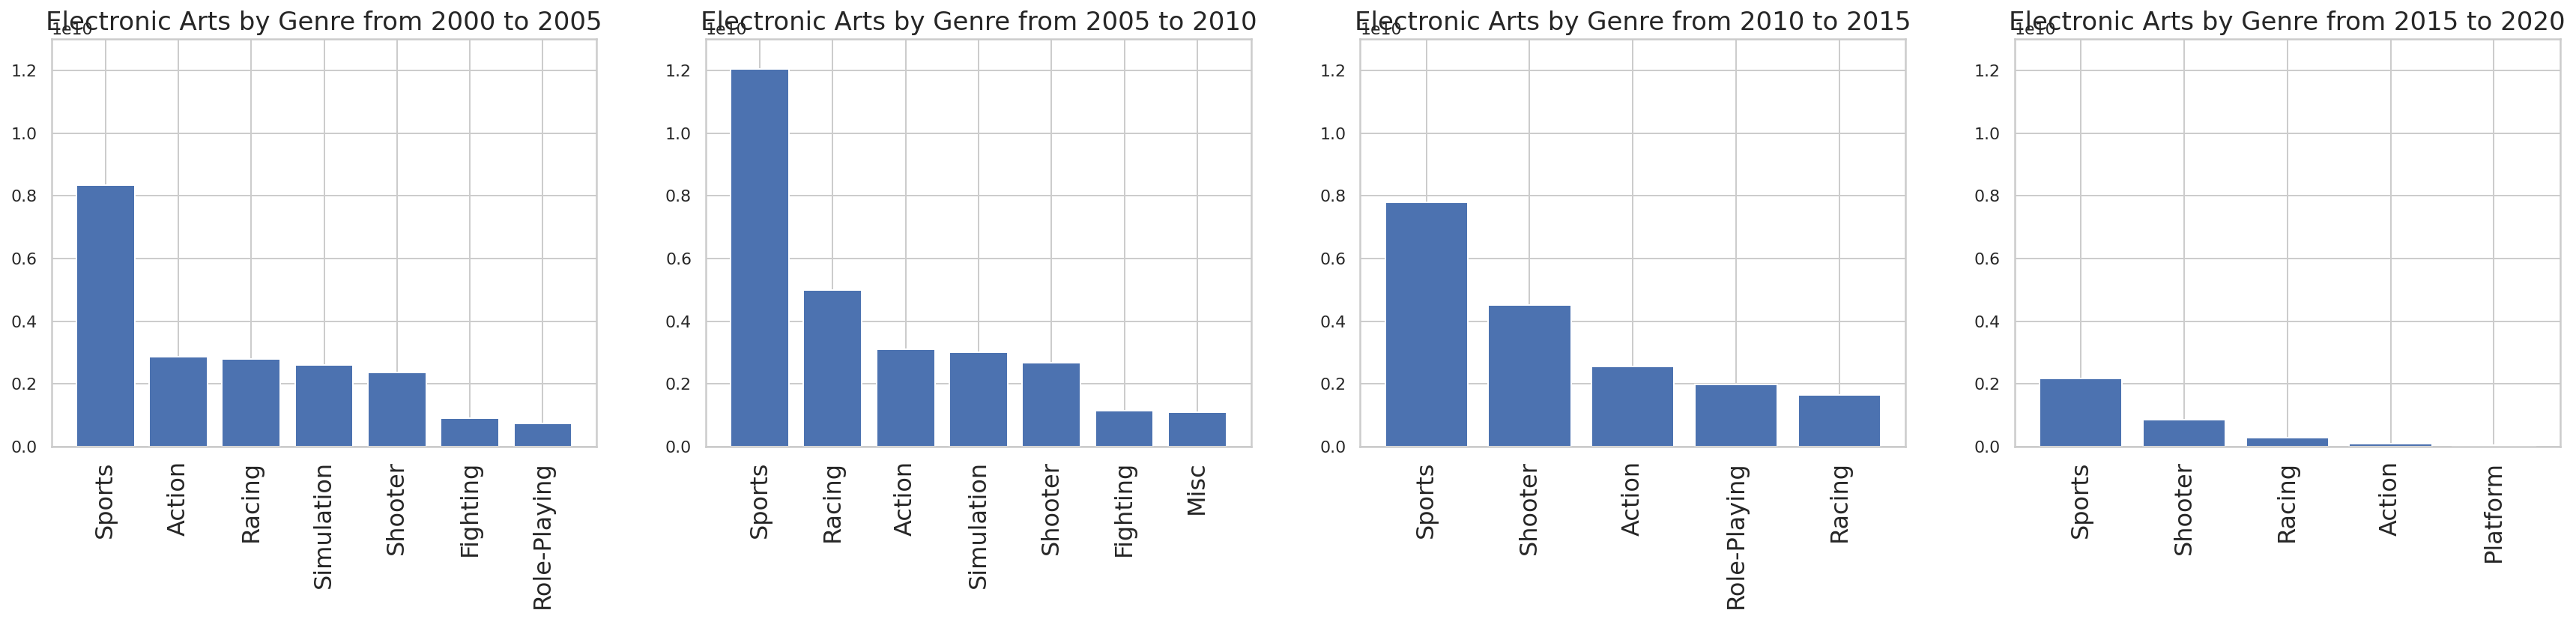

In [29]:
# Electronic Arts 출판사의 연도별 장르별 매출 순위 

years00 = df[(df['Year']>= 2000) &(df['Year'] < 2005)]
years05 = df[(df['Year']>= 2005) &(df['Year'] < 2010)]
years10 = df[(df['Year'] >= 2010) & (df['Year']<2015)]
years15 = df[df['Year'] >= 2015]
# Electronic Arts 출판사의 2000~2005 장르별 매출 순위
Genre00 = years00[years00['Publisher'] == 'Electronic Arts'].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).head(7)
# Electronic Arts 출판사의 2005~2010 장르별 매출 순위 
Genre05 = years05[years05['Publisher'] == 'Electronic Arts'].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).head(7)
# Electronic Arts 출판사의 2010~2015 장르별 매출 순위 
Genre10 = years10[years10['Publisher'] == 'Electronic Arts'].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).head(5)
# Electronic Arts 출판사의 2015~2020 장르별 매출 순위 
Genre15 = years15[years15['Publisher'] == 'Electronic Arts'].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).head(5)

fig = plt.subplots(1,4, figsize=(30, 5))
plt.subplot(1,4,1)
plt.bar(Genre00.index,Genre00)
plt.ylim(0,13000000000)
plt.title('Electronic Arts by Genre from 2000 to 2005', fontsize= 17)
plt.xticks(rotation=90, fontsize= 16);

plt.subplot(1,4,2)
plt.bar(Genre05.index,Genre05)
plt.ylim(0,13000000000)
plt.title('Electronic Arts by Genre from 2005 to 2010', fontsize= 17)
plt.xticks(rotation=90, fontsize= 16);

plt.subplot(1,4,3)
plt.bar(Genre10.index,Genre10)
plt.ylim(0,13000000000)
plt.title('Electronic Arts by Genre from 2010 to 2015', fontsize= 17)
plt.xticks(rotation=90, fontsize= 16);


plt.subplot(1,4,4)
plt.bar(Genre15.index,Genre15)
plt.ylim(0,13000000000)
plt.title('Electronic Arts by Genre from 2015 to 2020', fontsize= 17)
plt.xticks(rotation=90, fontsize= 16);

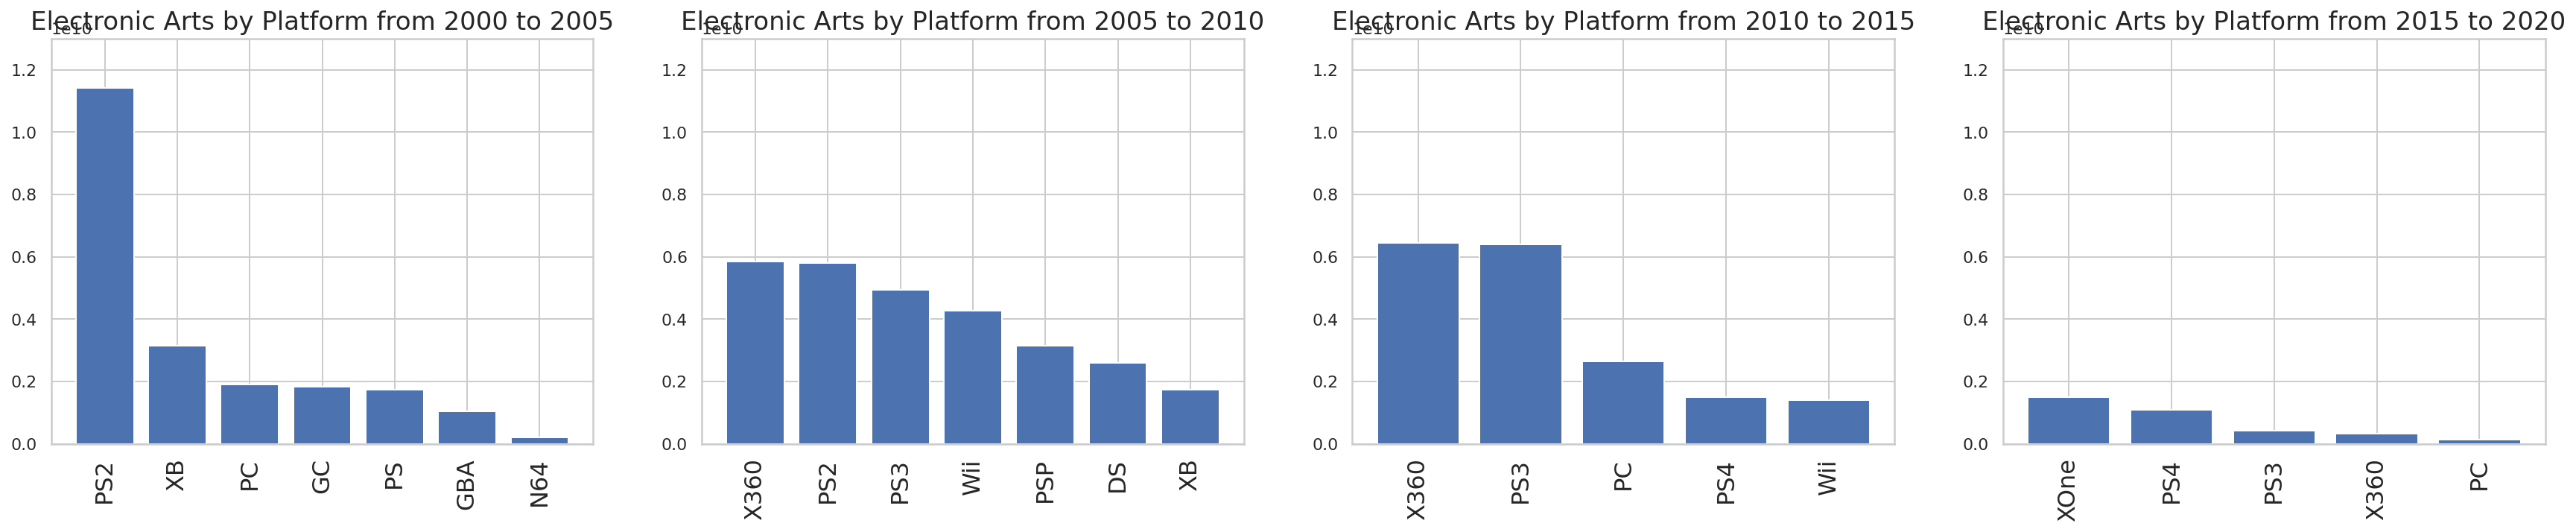

In [30]:
# Electronic Arts 출판사의 연도별 플랫폼별 매출 순위 

years00 = df[(df['Year']>= 2000) &(df['Year'] < 2005)]
years05 = df[(df['Year']>= 2005) &(df['Year'] < 2010)]
years10 = df[(df['Year'] >= 2010) & (df['Year']<2015)]
years15 = df[df['Year'] >= 2015]
# Electronic Arts 출판사의 2000~2005 플랫폼별 매출 순위
Platform00 = years00[years00['Publisher'] == 'Electronic Arts'].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(7)
# Electronic Arts 출판사의 2005~2010 플랫폼별 매출 순위 
Platform05 = years05[years05['Publisher'] == 'Electronic Arts'].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(7)
# Electronic Arts 출판사의 2010~2015 플랫폼별 매출 순위 
Platform10 = years10[years10['Publisher'] == 'Electronic Arts'].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(5)
# Electronic Arts 출판사의 2015~2020 플랫폼별 매출 순위 
Platform15 = years15[years15['Publisher'] == 'Electronic Arts'].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(5)

fig = plt.subplots(1,4, figsize=(30, 5))
plt.subplot(1,4,1)
plt.bar(Platform00.index,Platform00)
plt.ylim(0,13000000000)
plt.title('Electronic Arts by Platform from 2000 to 2005', fontsize= 17)
plt.xticks(rotation=90, fontsize= 16);

plt.subplot(1,4,2)
plt.bar(Platform05.index,Platform05)
plt.ylim(0,13000000000)
plt.title('Electronic Arts by Platform from 2005 to 2010', fontsize= 17)
plt.xticks(rotation=90, fontsize= 16);

plt.subplot(1,4,3)
plt.bar(Platform10.index,Platform10)
plt.ylim(0,13000000000)
plt.title('Electronic Arts by Platform from 2010 to 2015', fontsize= 17)
plt.xticks(rotation=90, fontsize= 16);


plt.subplot(1,4,4)
plt.bar(Platform15.index,Platform15)
plt.ylim(0,13000000000)
plt.title('Electronic Arts by Platform from 2015 to 2020', fontsize= 17)
plt.xticks(rotation=90, fontsize= 16);

NameError: ignored

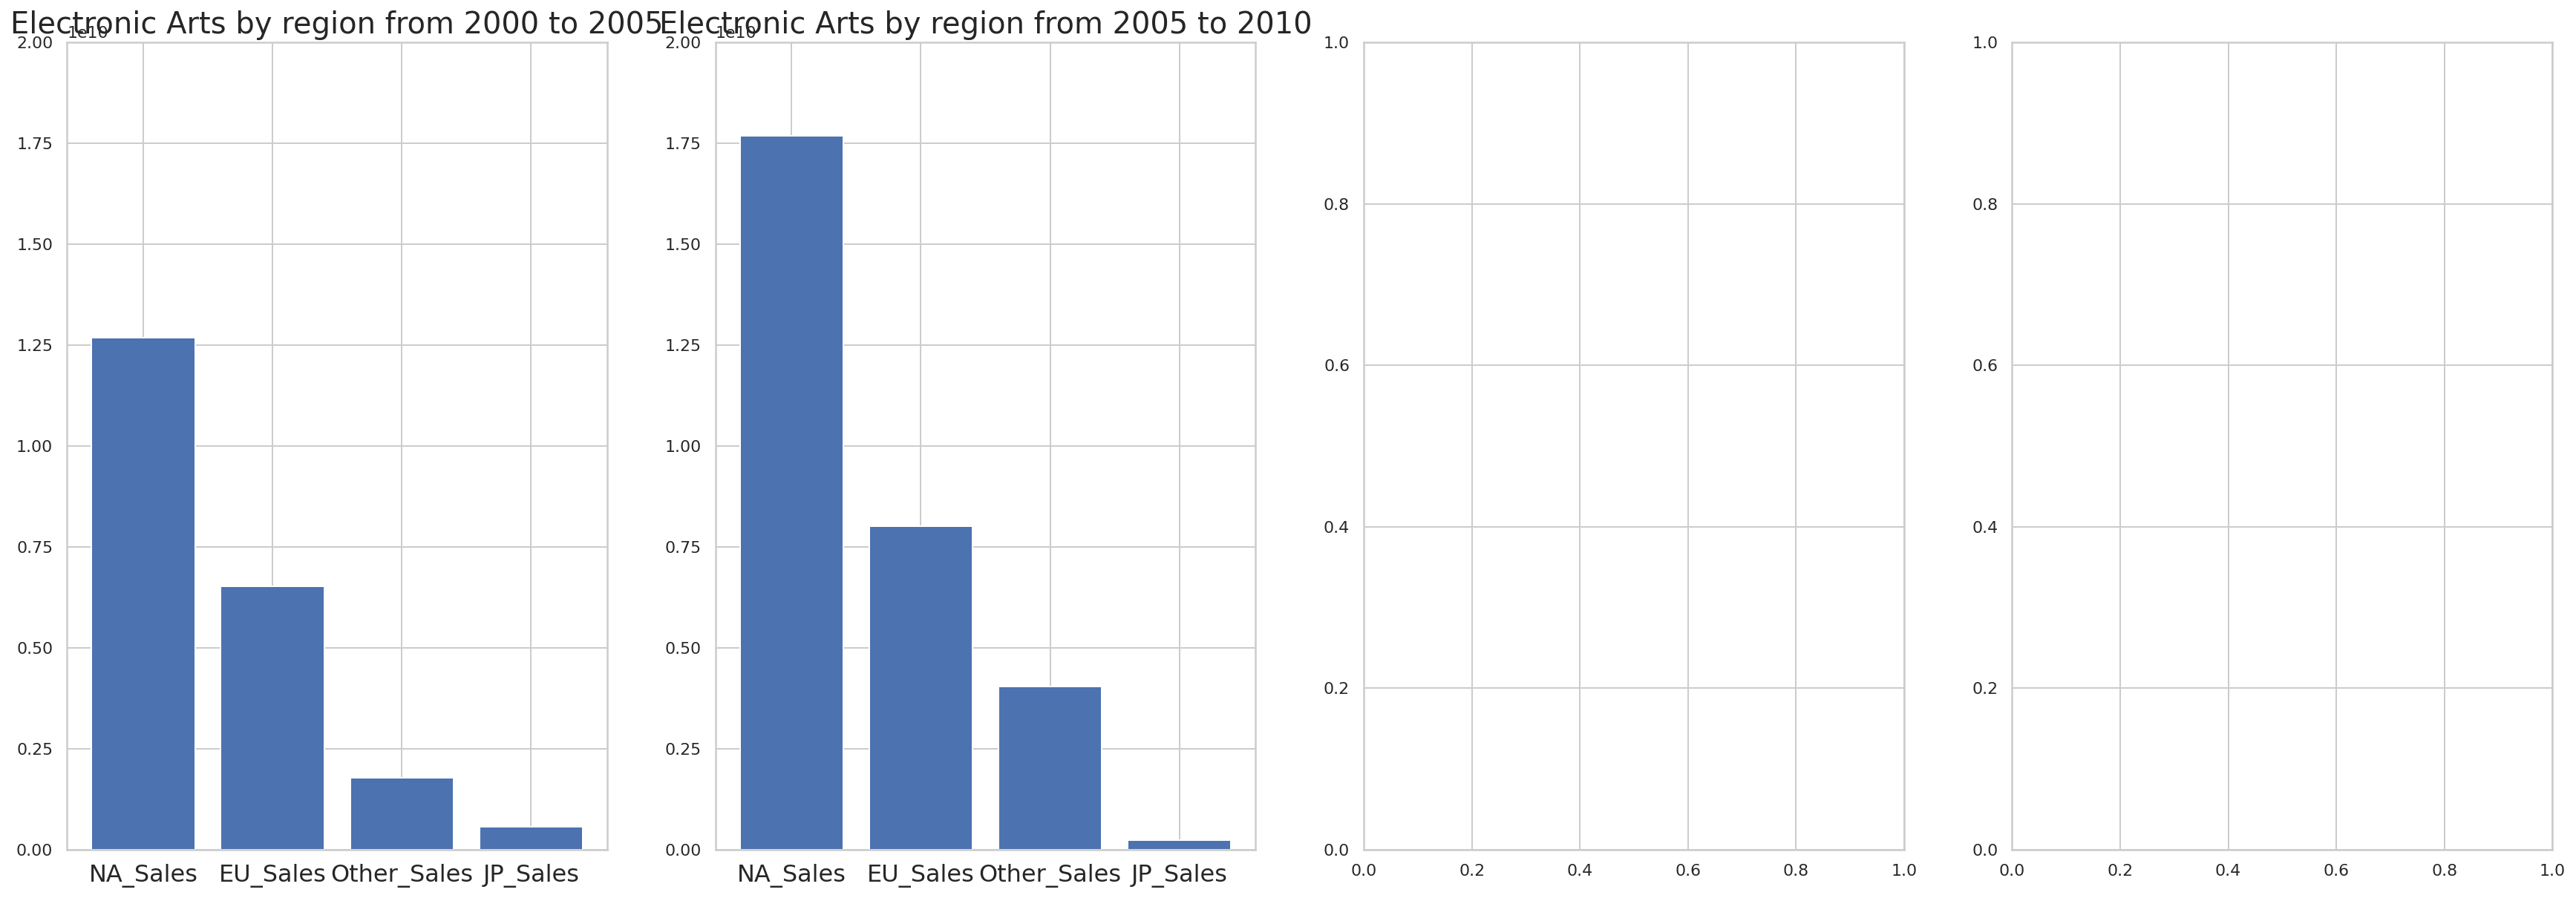

In [31]:
# Electronic Arts출판사의 연도별 지역의 변화 
years00 = df[(df['Year']>= 2000) &(df['Year'] < 2005)]
years05 = df[(df['Year']>= 2005) &(df['Year'] < 2010)]
years10 = df[(df['Year'] >= 2010) & (df['Year']<2015)]
years15 = df[df['Year'] >= 2015]
# Electronic Arts 출판사의 2000~2005 지역 출고량
region00 = years00[years00['Publisher'] == 'Electronic Arts'][['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(ascending=False)
# Electronic Arts 출판사의 2005~2010 지역 출고량
region05 = years05[years05['Publisher'] == 'Electronic Arts'][['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(ascending=False)
# Electronic Arts 출판사의 2010~2015 지역 출고량
region10 = years10[years10['Publisher'] == 'Electronic Arts'][['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(ascending=False)
# Electronic Arts 출판사의 2015~2020 지역 출고량
region15 = years15[years15['Publisher'] == 'Electronic Arts'][['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(ascending=False)

fig = plt.subplots(1,4, figsize=(30, 10))
plt.subplot(1,4,1)
plt.bar(region00.index,region00)
plt.ylim(0,20000000000)
plt.title('Electronic Arts by region from 2000 to 2005', fontsize= 20)
plt.xticks(rotation=0, fontsize= 16);

plt.subplot(1,4,2)
plt.bar(region05.index,region05)
plt.ylim(0,20000000000)
plt.title('Electronic Arts by region from 2005 to 2010', fontsize= 20)
plt.xticks(rotation=0, fontsize= 16);

plt.subplot(1,4,3)
plt.bar(EA_region10.index,EA_region10)
plt.ylim(0,20000000000)
plt.title('Electronic Arts by region from 2010 to 2015', fontsize= 20)
plt.xticks(rotation=0, fontsize= 16);


plt.subplot(1,4,4)
plt.bar(region15.index,region15)
plt.ylim(0,20000000000)
plt.title('Electronic Arts by region from 2015 to 2020', fontsize= 20)
plt.xticks(rotation=0, fontsize= 16);

- Electronic Arts 출판사의 **연도별 장르의 출고량 추이**
    - 과거 부터 현재까지 Sports 장르 게임에 치중되어 출시되었습니다. 최근 트랜드인 **Action**  게임은 다소 약하다는 점을 알 수 있습니다.
- Electronic Arts 출판사의 **연도별 플랫폼의 출고량 추이**
    - 최근 5년 동안 XOne가 PS4 보다 많은 것을 알 수 있습니다. 최근 전체 시장에서 **PS4 흥행**한다는 점을 고려하여 PS4 출시에 집중해야합니다.
- Electronic Arts 출판사의 **연도별 지역의 출고량 추이**
    - 과거부터 현재까지 북미(NA)지역과 유럽(EU)지역에서 꾸준히 인기가 있지만 점점 줄어드는 추세입니다.

- Electronic Arts는 Sports 장르에 특화되어 가장 많은 매출낸 출판사이기 때문에 현재 트렌드를 잘 반영 할 수 있는 출판사가 아닌 것을 알 수 있습니다.

### **7.8 Action 게임을 새롭게 출시한다면 어떨까?**

따라서 트렌드를 반영하기 위해서 게임 장르에서 Top 3 연간 매출 추이를  살펴봤습니다.  

 역시 Action 게임 장르가 다른 장르에 비해  매출이 높은 것을 알 수있습니다. 

그럼 이제 **Action** 장르를 집중하여 **어떤 출판사,지역,플랫폼**에 만들어야 할까요?

In [ ]:
# 게임 장르 Top 3(Action,Shooter,Sports) 연간 매출 추이
Total_Sales_A = df[df['Genre'] =='Action'].groupby('Year')['Total_Sales'].sum()
Total_Sales_S = df[df['Genre'] =='Shooter'].groupby('Year')['Total_Sales'].sum()
Total_Sales_P = df[df['Genre'] =='Sports'].groupby('Year')['Total_Sales'].sum()
fig = plt.subplots(1,4, figsize=(15, 7))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

plt.subplot(3,1,1)
plt.bar(Total_Sales_A.index,Total_Sales_A)
plt.ylim(0,11000000000)
plt.xlim(1979,2020)
plt.title('Action Total Sales from 1980 to 2020', fontsize= 15)
plt.xticks(rotation=0, fontsize= 15);

plt.subplot(3,1,2)
plt.bar(Total_Sales_S.index,Total_Sales_S)
plt.ylim(0,11000000000)
plt.xlim(1979,2020)
plt.title('Shooter Total Sales from 1980 to 2020', fontsize= 15)
plt.xticks(rotation=0, fontsize= 15);

plt.subplot(3,1,3)
plt.bar(Total_Sales_P.index,Total_Sales_P)
plt.ylim(0,11000000000)
plt.xlim(1979,2020)
plt.title('Sports Total Sales from 1980 to 2020', fontsize= 15)
plt.xticks(rotation=0, fontsize= 15);


In [ ]:
# Action장르의 연도별 출판사별 매출 순위 

years00 = df[(df['Year']>= 2000) &(df['Year'] < 2005)]
years05 = df[(df['Year']>= 2005) &(df['Year'] < 2010)]
years10 = df[(df['Year'] >= 2010) & (df['Year']<2015)]
years15 = df[df['Year'] >= 2015]
# Action 장르의 2000~2005 출판사별 매출 순위
Publisher00 = years00[years00['Genre'] == 'Action'].groupby('Publisher')['Total_Sales'].sum().sort_values(ascending=False).head(7)
# Action 장르의 2005~2010 출판사별 매출 순위 
Publisher05 = years05[years05['Genre'] == 'Action'].groupby('Publisher')['Total_Sales'].sum().sort_values(ascending=False).head(7)
# Action 장르의 2010~2015 출판사별 매출 순위 
Publisher10 = years10[years10['Genre'] == 'Action'].groupby('Publisher')['Total_Sales'].sum().sort_values(ascending=False).head(5)
# Action 장르의 2015~2020 출판사별 매출 순위 
Publisher15 = years15[years15['Genre'] == 'Action'].groupby('Publisher')['Total_Sales'].sum().sort_values(ascending=False).head(5)

fig = plt.subplots(1,4, figsize=(30, 5))
plt.subplot(1,4,1)
plt.bar(Publisher00.index,Publisher00)
plt.ylim(0,13000000000)
plt.title('Action by Publisher from 2000 to 2005', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);

plt.subplot(1,4,2)
plt.bar(Publisher05.index,Publisher05)
plt.ylim(0,13000000000)
plt.title('Action by Publisher from 2005 to 2010', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);

plt.subplot(1,4,3)
plt.bar(Publisher10.index,Publisher10)
plt.ylim(0,13000000000)
plt.title('Action by Publisher from 2010 to 2015', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);


plt.subplot(1,4,4)
plt.bar(Publisher15.index,Publisher15)
plt.ylim(0,13000000000)
plt.title('Action by Publisher from 2015 to 2020', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);

In [ ]:
# Action출판사의 연도별 플랫폼의 변화 

years00 = df[(df['Year']>= 2000) &(df['Year'] < 2005)]
years05 = df[(df['Year']>= 2005) &(df['Year'] < 2010)]
years10 = df[(df['Year'] >= 2010) & (df['Year']<2015)]
years15 = df[df['Year'] >= 2015]
# Action 출판사의 2000~2005 플랫폼 출고량
Platform00 = years00[years00['Genre'] == 'Action'].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(7)
# Action 출판사의 2005~2010 플랫폼 출고량
Platform05 = years05[years05['Genre'] == 'Action'].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(7)
# Action 출판사의 2010~2015 플랫폼 출고량
Platform10 = years10[years10['Genre'] == 'Action'].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(7)
# Action 출판사의 2015~2020 플랫폼 출고량
Platform15 = years15[years15['Genre'] == 'Action'].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(7)

fig = plt.subplots(1,4, figsize=(30, 5))
plt.subplot(1,4,1)
plt.bar(Platform00.index,Platform00)
plt.ylim(0,13000000000)
plt.title('Action by Platform from 2000 to 2005', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);

plt.subplot(1,4,2)
plt.bar(Platform05.index,Platform05)
plt.ylim(0,13000000000)
plt.title('Action by Platform from 2005 to 2010', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);

plt.subplot(1,4,3)
plt.bar(Platform10.index,Platform10)
plt.ylim(0,13000000000)
plt.title('Action by Platform from 2010 to 2015', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);


plt.subplot(1,4,4)
plt.bar(Platform15.index,Platform15)
plt.ylim(0,13000000000)
plt.title('Action by Platform from 2015 to 2020', fontsize= 20)
plt.xticks(rotation=90, fontsize= 16);

In [ ]:
# Action출판사의 연도별 지역의 변화 
years00 = df[(df['Year']>= 2000) &(df['Year'] < 2005)]
years05 = df[(df['Year']>= 2005) &(df['Year'] < 2010)]
years10 = df[(df['Year'] >= 2010) & (df['Year']<2015)]
years15 = df[df['Year'] >= 2015]
# Action 출판사의 2000~2005 지역 출고량
region00 = years00[years00['Genre'] == 'Action'][['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(ascending=False)
# Action 출판사의 2005~2010 지역 출고량
region05 = years05[years05['Genre'] == 'Action'][['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(ascending=False)
# Action 출판사의 2010~2015 지역 출고량
region10 = years10[years10['Genre'] == 'Action'][['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(ascending=False)
# Action 출판사의 2015~2020 지역 출고량
region15 = years15[years15['Genre'] == 'Action'][['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values(ascending=False)

fig = plt.subplots(1,4, figsize=(30, 10))
plt.subplot(1,4,1)
plt.bar(region00.index,region00)
plt.ylim(0,25000000000)
plt.title('Action by region from 2000 to 2005', fontsize= 20)
plt.xticks(rotation=0, fontsize= 16);

plt.subplot(1,4,2)
plt.bar(region05.index,region05)
plt.ylim(0,25000000000)
plt.title('Action by region from 2005 to 2010', fontsize= 20)
plt.xticks(rotation=0, fontsize= 16);

plt.subplot(1,4,3)
plt.bar(EA_region10.index,EA_region10)
plt.ylim(0,25000000000)
plt.title('Action by region from 2010 to 2015', fontsize= 20)
plt.xticks(rotation=0, fontsize= 16);


plt.subplot(1,4,4)
plt.bar(region15.index,region15)
plt.ylim(0,25000000000)
plt.title('Action by region from 2015 to 2020', fontsize= 20)
plt.xticks(rotation=0, fontsize= 16);

- Action 장르의  **연도별 출판사별의 출고량 추이**
    - 이름이 짤려서 보이지 않는데 1위는 워너 브라더스라는 게임 회사가 Action 장르에서  매출이 높은 것을 알 수 있습니다.
- Action 장르의 **연도별 플랫폼의 출고량 추이**
    - 과거부터 현재까지 플레이스테이션에서 인기가 많은 것을 알 수 있습니다.
- Action 장르의 **연도별 지역의 출고량 추이**
    - 유럽(EU)지역과 북미(NA)지역에 인기가 많은 것을 알 수 있습니다.

## **8.결론 및 인사이트**

- **게임회사(Publisher)**
    - warner bros
- **장르(Genre)**
    - Action
- **플렛폼(Platform)**
    - PS4, 3DS, Xone
- **출시지역**
    - 북미(NA)지역과 유럽(EU) 지역

게임을 출시한다면  **warner bros** 출판사에서 **북미와 유럽지역**에 **Action 장르** 게임을 출시해야합니다. 

여기서 전체적인 매출이 줄고 있기 때문에 멀티 플랫폼을 지원하여 **PS4, 3DS, XOne 플랫폼**등 다양하게 판매한다면 매출 상승에 도움이 될 것이라고 생각합니다.